### ML C70 - Lending Club Case Study 
- Group Facilitator: Naresh Padiyar 

#### Importing the required python libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

#Ignore warnings
warnings.filterwarnings('ignore')

## Load the loan.csv file in a pandas dataframe

In [2]:
loan_df = pd.read_csv('loan.csv')

## Analyze the dataframe

In [3]:
# There are 39717 rows and 111 Columns in the dataframe
loan_df.shape

(39717, 111)

In [4]:
# Print first 5 rows to see a what kind of data in present in the dataframe
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [5]:
# List all the column names in the dataframe
loan_df.columns.to_list()

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_

## Data Cleaning

#### Identify null columns and drop them

In [6]:
# List the column names and the % of null values in them
(loan_df.isnull().sum().sort_values(ascending=False)*100)/len(loan_df)

verification_status_joint    100.0
annual_inc_joint             100.0
mo_sin_old_rev_tl_op         100.0
mo_sin_old_il_acct           100.0
bc_util                      100.0
                             ...  
delinq_amnt                    0.0
policy_code                    0.0
earliest_cr_line               0.0
delinq_2yrs                    0.0
id                             0.0
Length: 111, dtype: float64

In [7]:
#### Identify columns where all rows are null.
total_number_columns = len(loan_df.columns)
print("Total number of columns is", total_number_columns)
total_number_of_na_columns = len(loan_df.columns[loan_df.isnull().all()].to_list())
print("Total number of columns where all rows containing null values is", total_number_of_na_columns)

na_columns = list(loan_df.columns[loan_df.isnull().all()])
print("The columns where all rows containing null values are: ", na_columns)

Total number of columns is 111
Total number of columns where all rows containing null values is 54
The columns where all rows containing null values are:  ['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl

In [8]:
# Dropping columns having all rows with null values
loan_df.dropna(axis=1, how="all", inplace=True)

In [9]:
# 54 null columns have been dropped and now we are left with 57 columns
total_number_columns = len(loan_df.columns)
print("Total number of columns left after dropping null columns : ", total_number_columns)

Total number of columns left after dropping null columns :  57


In [10]:
# Identify columns where every row has unique values
unique_columns = [col for col in loan_df.columns if loan_df[col].nunique() == len(loan_df)]
unique_columns

['id', 'member_id', 'url']

In [11]:
### Drop 'id', 'member_id', 'url' columns as they won't add much value to the EDA analysis, because each row value is unique
loan_df.drop(['id','member_id', 'url'], axis=1, inplace=True)

In [12]:
# Delete columns with title or description as they won't add much value to our EDA analysis
loan_df.drop(columns=['desc','title','emp_title'], axis=1, inplace=True)

In [13]:
#Identify columns with only one value
loan_df.nunique().sort_values()

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
pymnt_plan                        1
term                              2
next_pymnt_d                      2
pub_rec_bankruptcies              3
verification_status               3
loan_status                       3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
emp_length                       11
delinq_2yrs                      11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
mths_since_last_delinq           95
last_pymnt_d                

In [14]:
# Drop columns with only 1 value as they won't contribute to the EDA analysis
for column in loan_df.columns:
    if loan_df[column].nunique() == 1:
        print("Dropping column", column)
        loan_df.drop(column, axis=1, inplace=True)

Dropping column pymnt_plan
Dropping column initial_list_status
Dropping column collections_12_mths_ex_med
Dropping column policy_code
Dropping column application_type
Dropping column acc_now_delinq
Dropping column chargeoff_within_12_mths
Dropping column delinq_amnt
Dropping column tax_liens


In [15]:
# Identify and Drop columns which have more than 50% null values
for column in loan_df.columns:
    percentage_of_null_value_in_column = loan_df[column].isna().mean().round(2)
    if percentage_of_null_value_in_column >= 0.50:
        print(column ," ",percentage_of_null_value_in_column)
        loan_df.drop(column, axis=1, inplace=True)

mths_since_last_delinq   0.65
mths_since_last_record   0.93
next_pymnt_d   0.97


# Below are the columns which are either realted to post loan approvals or represent customer behavioural atrributes and may not add value to our EDA analysis, so we will drop these columns as well.
- delinq_2yrs
- earliest_cr_line
- last_pymnt_amnt
- last_pymnt_d
- inq_last_6mths
- open_acc
- pub_rec   
- revol_bal
- revol_util
- total_acc
- out_prncp
- out_prncp_inv
- total_pymnt
- total_pymnt_inv 
- total_rec_prncp
- total_rec_int
- total_rec_late_fee 
- recoveries
- collection_recovery_fee
- last_credit_pull_d

In [16]:
loan_df.drop(columns=['delinq_2yrs','earliest_cr_line','last_pymnt_amnt','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_credit_pull_d'], axis=1, inplace=True)

In [17]:
# Now we are left with only 19 columns
loan_df.shape

(39717, 19)

### Data Formating

In [18]:
# Lets check the data types of the columns
loan_df.dtypes

loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
zip_code                 object
addr_state               object
dti                     float64
pub_rec_bankruptcies    float64
dtype: object

In [19]:
# Under verification_status we have 3 categories Not Verified, Verified and Source Verified.
# Verified and Source Verified both mean the same thing, hence we are replacing the value Source Verified to Verified
loan_df['verification_status'] = loan_df['verification_status'].str.replace("Source Verified","Verified")
loan_df['verification_status'].value_counts()

verification_status
Verified        22796
Not Verified    16921
Name: count, dtype: int64

In [20]:
# Term column is a categorical column with 2 categories 36 months and 60 months.
loan_df['term'].value_counts()

term
 36 months    29096
 60 months    10621
Name: count, dtype: int64

In [21]:
# Convert dtype of terms column from string to int, so that we can use the column to create new derived columns using bucketing.
loan_df['term'] = loan_df['term'].str.replace(" months","")
loan_df['term'] = loan_df['term'].astype('int')

In [22]:
# convert dtype of int_rate column from string to float, so that we can use the column to create new derived columns using bucketing.
loan_df['int_rate'] = loan_df['int_rate'].str.replace('%','')
loan_df['int_rate'] = loan_df['int_rate'].astype('float')

In [23]:
# convert the dtype of columns loan_amnt and funded_amnt from string to int, so that we can use the column to create new derived columns using bucketing.
loan_df['loan_amnt'] = loan_df['loan_amnt'].astype('int')
loan_df['funded_amnt'] = loan_df['funded_amnt'].astype('int')


In [24]:
# Check grade column
loan_df['grade'].value_counts()

grade
B    12020
A    10085
C     8098
D     5307
E     2842
F     1049
G      316
Name: count, dtype: int64

In [25]:
# Check emp_length column
loan_df['emp_length'].value_counts()

emp_length
10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: count, dtype: int64

In [26]:
# Covert dtype of issue_d column from string to date, , so that we can use the column to create new derived columns like issue_year and issue_month
loan_df['issue_d'] = pd.to_datetime(loan_df['issue_d'], format='%b-%y')

In [27]:
# Check the dtype of all column is as we expect.
loan_df.dtypes

loan_amnt                        int64
funded_amnt                      int64
funded_amnt_inv                float64
term                             int64
int_rate                       float64
installment                    float64
grade                           object
sub_grade                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                 datetime64[ns]
loan_status                     object
purpose                         object
zip_code                        object
addr_state                      object
dti                            float64
pub_rec_bankruptcies           float64
dtype: object

## Dropping and Imputing Rows

#### The goal of the EDA is to identify who is likely to default and this can only be said in case of either fully paid or charged off loans, hence we will be deleting all rows where loan_status is equal to "Current"

In [28]:
loan_df['loan_status'].value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

In [29]:
# Delete all rows where loan_status is equal to Current
loan_df = loan_df[loan_df['loan_status'] != "Current"]

In [30]:
# Identify columns which still have null values.
# We can see that emp_length and pub_rec_bankruptcies columns still have some na values of 2.6% and 1.8% respectively.
(loan_df.isnull().sum()*100/len(loan_df))

loan_amnt               0.000000
funded_amnt             0.000000
funded_amnt_inv         0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_length              2.677761
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
zip_code                0.000000
addr_state              0.000000
dti                     0.000000
pub_rec_bankruptcies    1.806776
dtype: float64

In [31]:
# Drop the rows where emp_length column has null values
loan_df = loan_df[loan_df['emp_length'].notna()]

In [32]:
# Drop the rows where pub_rec_bankruptcies column has null values
loan_df = loan_df[loan_df['pub_rec_bankruptcies'].notna()]

In [33]:
# Validate that we no longer have any columns with null values
(loan_df.isnull().sum()*100/len(loan_df))

loan_amnt               0.0
funded_amnt             0.0
funded_amnt_inv         0.0
term                    0.0
int_rate                0.0
installment             0.0
grade                   0.0
sub_grade               0.0
emp_length              0.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
issue_d                 0.0
loan_status             0.0
purpose                 0.0
zip_code                0.0
addr_state              0.0
dti                     0.0
pub_rec_bankruptcies    0.0
dtype: float64

### Creating Derived columns

In [34]:
# Create issue_year and issue_month columns using the data from issue_d column
loan_df['issue_year'] = pd.DatetimeIndex(loan_df['issue_d']).year
loan_df['issue_month'] = pd.DatetimeIndex(loan_df['issue_d']).month_name()

# Outlier Treatment

##### Box Plot for loan_amnt

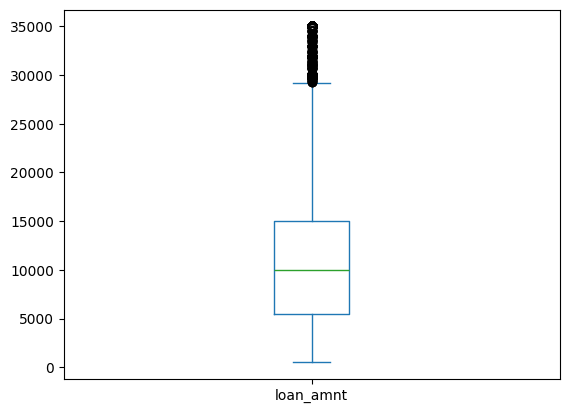

In [35]:
loan_df['loan_amnt'].plot.box()
plt.show()

#### Box plot for funded_amnt

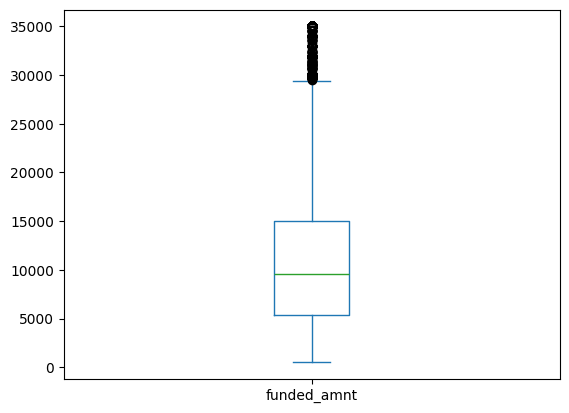

In [36]:
loan_df['funded_amnt'].plot.box()
plt.show()

##### Box plot for funded_amnt_inv column

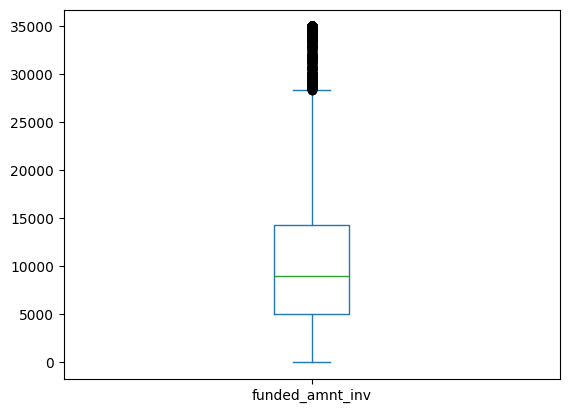

In [37]:
loan_df['funded_amnt_inv'].plot.box()
plt.show()

##### Box plot for annual_inc column

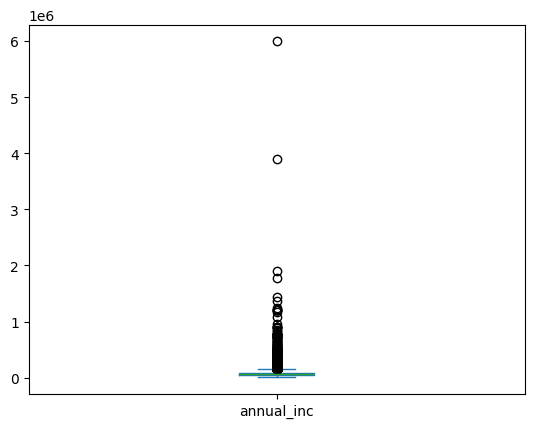

In [38]:
loan_df['annual_inc'].plot.box()
plt.show()

##### Box Plot for int_rate column

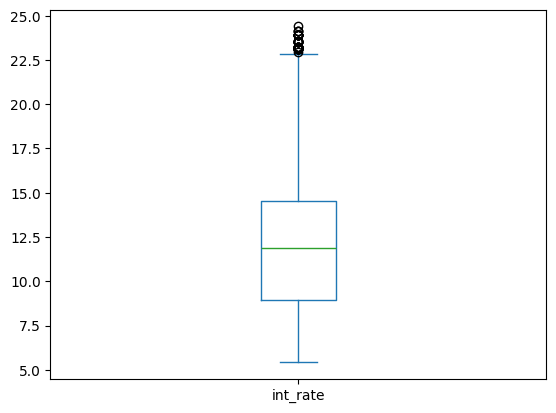

In [39]:
loan_df['int_rate'].plot.box()
plt.show()

##### Box plot for installment column

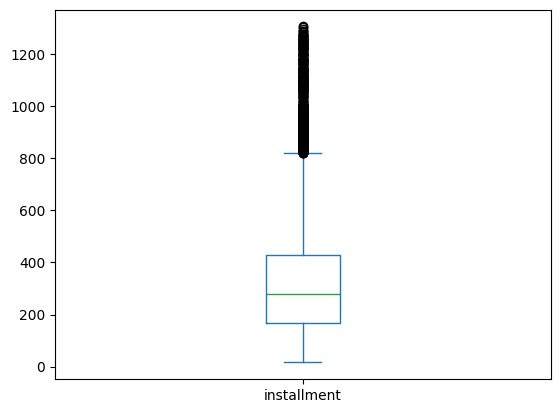

In [40]:
loan_df['installment'].plot.box()
plt.show()

#### From the above box plots we can clearly see that outliers exists for columns 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'annual_inc', 'int_rate', and 'installment'
#### Lets remove the outliers using the quantile mechanism

In [41]:
# List of columns containing outliers
outliers_columns = ['loan_amnt','funded_amnt','funded_amnt_inv','annual_inc','int_rate','installment']

# Define a function to treat the outliers
def remove_outliers(data, columns, threshold):
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    return data

# remove the outliers from the dataframe
loan_df = remove_outliers(loan_df, outliers_columns, 1.5)

### Plot the box plot once again to check if the outliers have been reduced

##### Box plot for loan_amount column post outlier treatment.

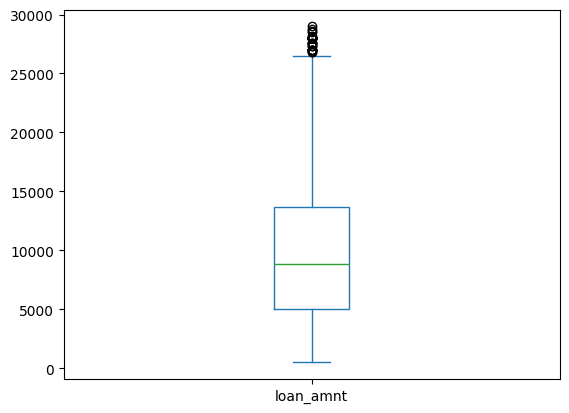

In [42]:
loan_df['loan_amnt'].plot.box()
plt.show()

##### Box plot for funded_amnt column post outlier treatment.

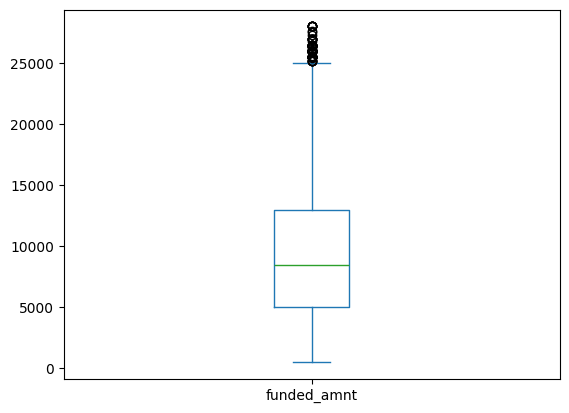

In [43]:
loan_df['funded_amnt'].plot.box()
plt.show()

##### Box plot for funded_amnt_inv column post outlier treatment.

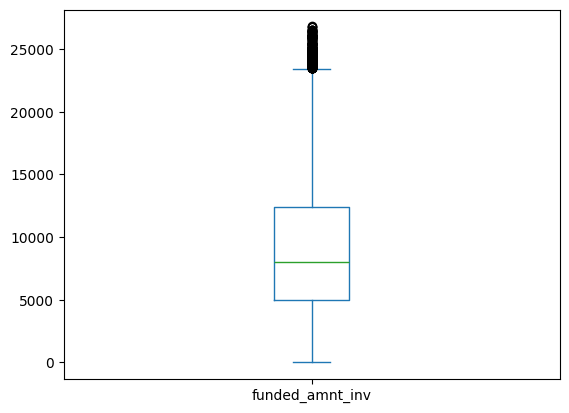

In [44]:
loan_df['funded_amnt_inv'].plot.box()
plt.show()

##### Box plot for annual_inc column post outlier treatment.

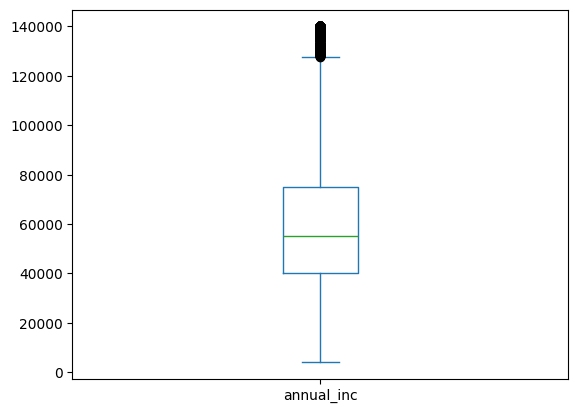

In [45]:
loan_df['annual_inc'].plot.box()
plt.show()

##### Box plot for int_rate column post outlier treatment.

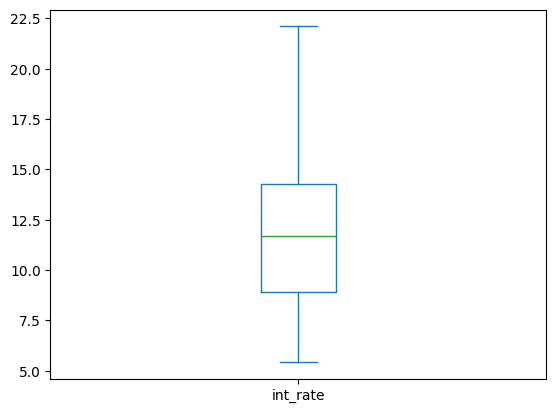

In [46]:
loan_df['int_rate'].plot.box()
plt.show()

##### Box plot for installment column post outlier treatment.

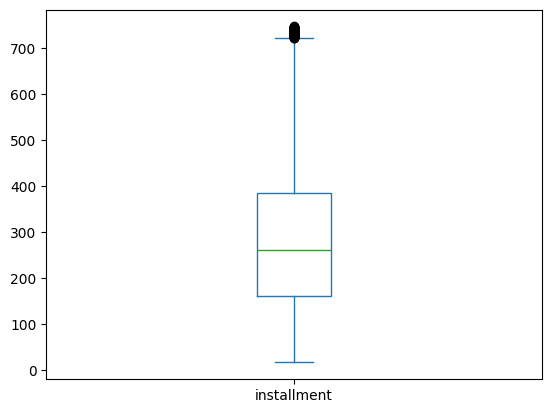

In [47]:
loan_df['installment'].plot.box()
plt.show()

### Data Analysis

#### Lets create some buckets for our EDA

##### Bucketing for Loan Amount

In [48]:
# Bucketing Loan Amount

def bucket_loan_amount(value):
    if value <= 5000:
        return '0 to 5K'
    elif (value > 5000) and (value <= 10000):
        return '5K to 10K'
    elif (value > 10000) and (value <= 15000):
        return '10K to 15K'
    else:
        return '15K and Above'
    
loan_df['loan_amnt_bucket'] = loan_df['loan_amnt'].apply(lambda x: bucket_loan_amount(x))

##### Bucketing for Annual Income

In [49]:
# Bucketing Annual Income

def bucket_annual_income(value):
    if value <= 40000:
        return '0 to 40K'
    elif (value > 40000) and (value <= 50000):
        return '40K to 50k'
    elif (value > 50000) and (value <= 60000):
        return '50K to 60K'
    elif (value > 60000) and (value <= 70000):
        return '60K to 70K'
    elif (value > 70000) and (value <= 80000):
        return '70K to 80K'
    elif (value > 80000) and (value <= 90000):
        return '80K to 90K'
    elif (value > 90000) and (value <= 100000):
        return '90K to 100K'
    elif (value > 100000) and (value <= 110000):
        return '100K to 110K'
    else:
        return '110K and Above'
    
loan_df['annual_income_bucket'] = loan_df['annual_inc'].apply(lambda x: bucket_annual_income(x))

##### Bucketing for Interest Rate

In [50]:
# Bucketing Interest Rate

def bucket_interest_rate(value):
    if (value > 5) and (value <= 9):
        return '5% - 9%'
    elif (value > 9) and (value <= 13):
        return '9% - 13%'
    elif (value > 13) and (value <= 17):
        return '13% - 17%'
    elif (value > 17) and (value <= 21):
        return '17% - 21%'
    elif (value > 21) and (value <= 24):
        return '21% - 24%'
    
loan_df['int_rate_bucket'] = loan_df['int_rate'].apply(lambda x: bucket_interest_rate(x))

##### Bucketing for dti, Debt to Income Ratio

In [51]:
# Bucketing dti Debt to Income Ration

def bucket_dti(value):
    if (value > 0) and (value <= 6):
        return '0 - 6'
    elif (value > 6) and (value <= 12):
        return '6 - 12'
    elif (value > 12) and (value <= 18):
        return '12 - 18'
    elif (value > 18) and (value <= 24):
        return '18 - 24'
    elif (value > 24) and (value <= 30):
        return '24 - 30'
    
loan_df['dti_bucket'] = loan_df['dti'].apply(lambda x: bucket_dti(x))

##### Bucketing for Installments

In [52]:
# Bucketing Installments

def bucket_installments(value):
    if (value > 0) and (value <= 100):
        return '0 - 100'
    elif (value > 100) and (value <= 200):
        return '100 - 200'
    elif (value > 200) and (value <= 300):
        return '200 - 300'
    elif (value > 300) and (value <= 400):
        return '300 - 400'
    elif (value > 400) and (value <= 500):
        return '400 - 500'
    elif (value > 500) and (value <= 600):
        return '500 - 600'
    elif (value > 600) and (value <= 700):
        return '600 - 700'
    elif (value > 700) and (value <= 800):
        return '700 - 800'
    elif (value > 800) and (value <= 900):
        return '800 - 900'
    elif (value > 900) and (value <= 1000):
        return '900 - 1000'
    elif (value > 1000) and (value <= 1100):
        return '1000 - 1100'
    elif (value > 1100) and (value <= 1200):
        return '1100 - 1200'
    elif (value > 1200) and (value <= 1300):
        return '1200-1300'
    else:
        return '1300 and Above'
    
loan_df['installment_bucket'] = loan_df['installment'].apply(lambda x: bucket_installments(x))

##### Bucketing for Funded Amout Investors

In [53]:
# Bucketing Funded Amount Investors

def bucket_funded_amnt_inv(value):
    if (value > 0) and (value <= 5000):
        return '0 - 5K'
    elif (value > 5000) and (value <= 10000):
        return '5K - 10K'
    elif (value > 10000) and (value <= 15000):
        return '10K - 15K'
    elif (value > 15000) and (value <= 20000):
        return '15K - 20K'
    elif (value > 20000) and (value <= 25000):
        return '20K - 25K'
    elif (value > 25000) and (value <= 30000):
        return '25K - 30K'
    elif (value > 30000) and (value <= 35000):
        return '30K - 35K'
    else:
        return '35K and Above'
    
loan_df['funded_amnt_inv_bucket'] = loan_df['funded_amnt_inv'].apply(lambda x: bucket_funded_amnt_inv(x))

## Define Functions to Plot Charts using Matplotlib and Seaborn

In [54]:
# Function to generate a seaborn distribution plot

def create_sns_displot(column, title_string, xlabel_string, ylabel_string):
    sns.displot(column, kde=True)
    plt.title(title_string, fontsize=20)
    plt.xlabel(xlabel_string, fontsize=15)
    plt.ylabel(ylabel_string, fontsize=15)
    return plt.show()
    #return plt.savefig("charts/univariate/"+ title_string +".png", bbox_inches='tight')


In [55]:
# Function to generate a seaborn box plot

def create_sns_boxplot(column):
    sns.boxplot(x=column)
    return plt.show()

In [56]:
# Function to create a matplotlib horzizontal bar chart

def create_mlt_hbar(column, title_string, xlabel_string, ylabel_string, figsizedetails):
    if figsizedetails[0]:
        plt.figure(figsize=(figsizedetails[1],figsizedetails[2]))
    column.value_counts().plot(kind='barh')
    plt.title(title_string, fontsize=20)
    plt.ylabel(xlabel_string,fontsize=15)
    plt.xlabel(ylabel_string,fontsize=15)
    for index,label in enumerate(column.value_counts()):
        plt.text(label, index, str(label), va='center', fontsize=10)
    return plt.show()
    #return plt.savefig("charts/univariate/"+ title_string +".png", bbox_inches='tight')

In [57]:
# Function to create a matplotlib donut chart

def create_mlt_donut(column, title_string):
    column.value_counts().plot(kind='pie', autopct='%1.0f%%', pctdistance=0.92)
    centre_circle = plt.Circle((0,0),0.85,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    plt.title(title_string, fontsize=20)
    plt.ylabel("")
    return plt.show()
    #return plt.savefig("charts/univariate/"+ title_string +".png", bbox_inches='tight')

In [58]:
# Function to create a seaborn countplot

def create_sns_countplot(dataframe_name, xaxis_column, hue_column, title_string, xlabel_string, ylabel_string, xaxis_rotation=False, figsizedetails=False):
    if figsizedetails[0]:
        plt.figure(figsize=(figsizedetails[1],figsizedetails[2]))
    ax = sns.countplot(data=dataframe_name, x=xaxis_column, hue=hue_column)
    plt.title(title_string, fontsize=20)
    plt.xlabel(xlabel_string, fontsize=15)
    plt.ylabel(ylabel_string, fontsize=15)
    for container in ax.containers:
        ax.bar_label(container)
    if xaxis_rotation:
        plt.xticks(rotation=90)
    return plt.show()
    #return plt.savefig("charts/bivariate/"+ title_string +".png", bbox_inches='tight')

In [59]:
# Function to create a seaborn barplot

def create_sns_barplot(dataframe_name, xaxis_column, yaxis_column, hue_column, title_string, xlabel_string, ylabel_string, figsizedetails):
    if figsizedetails[0]:
        plt.figure(figsize=(figsizedetails[1],figsizedetails[2]))
    ax = sns.barplot(data=dataframe_name, x=xaxis_column, y=yaxis_column, hue=hue_column, palette='deep')
    plt.title(title_string, fontsize=20)
    plt.xlabel(xlabel_string, fontsize=15)
    plt.ylabel(ylabel_string, fontsize=15)
    return plt.show()
    #return plt.savefig("charts/multivariate/"+ title_string +".png", bbox_inches='tight')

In [60]:
# Function to create a seaborn catplot

def create_sns_catplot(dataframe_name, xaxis_column, yaxis_column, hue_column, title_string, xlabel_string, ylabel_string, figsizedetails):
    if figsizedetails[0]:
        plt.figure(figsize=(figsizedetails[1],figsizedetails[2]))
    sns.catplot(data=dataframe_name, x=xaxis_column, y=yaxis_column, hue=hue_column, palette='deep', kind='box')
    plt.title(title_string, fontsize=20)
    plt.xlabel(xlabel_string, fontsize=15)
    plt.ylabel(ylabel_string, fontsize=15)
    return plt.show()
    #return plt.savefig("charts/multivariate/"+ title_string +".png", bbox_inches='tight')

# Univariate Analysis

#### Annual Income Distribution Chart

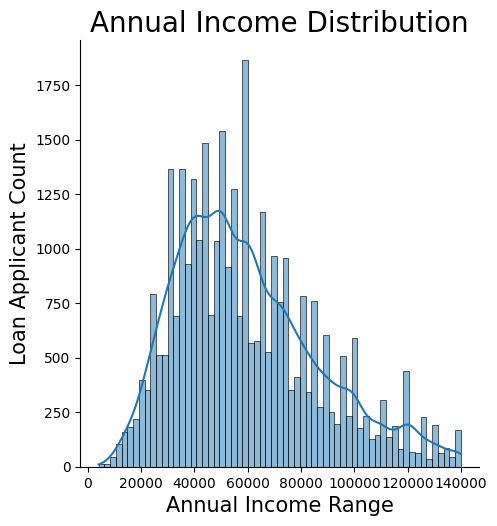

In [61]:
create_sns_displot(loan_df['annual_inc'],"Annual Income Distribution","Annual Income Range","Loan Applicant Count")

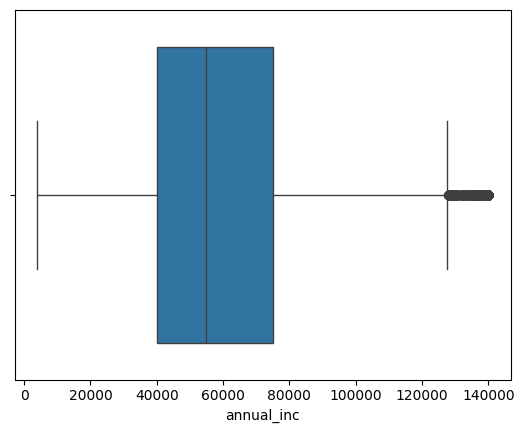

count     33123.000000
mean      59840.662766
std       26905.521024
min        4000.000000
25%       40000.000000
50%       55000.000000
75%       75000.000000
max      140000.000000
Name: annual_inc, dtype: float64

In [62]:
create_sns_boxplot(loan_df['annual_inc'])
loan_df['annual_inc'].describe()

In [63]:
print("Average annual income is :", round(loan_df['annual_inc'].mean(),0))

Average annual income is : 59841.0


## Conclusion: The annual income of most of the loan applicants is between 40k-75k and the average annual income is 59840

#### Loan Amount Chart

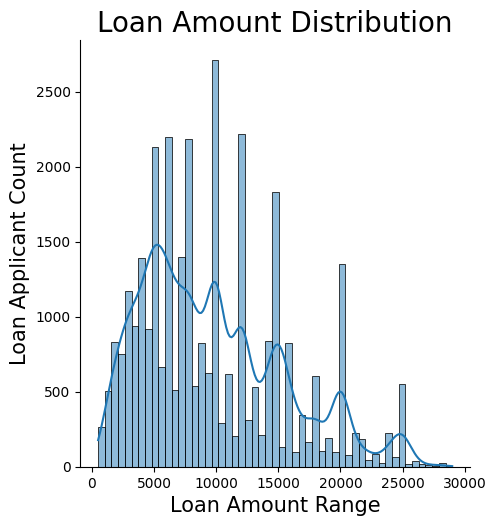

In [64]:
create_sns_displot(loan_df['loan_amnt'],"Loan Amount Distribution","Loan Amount Range","Loan Applicant Count")

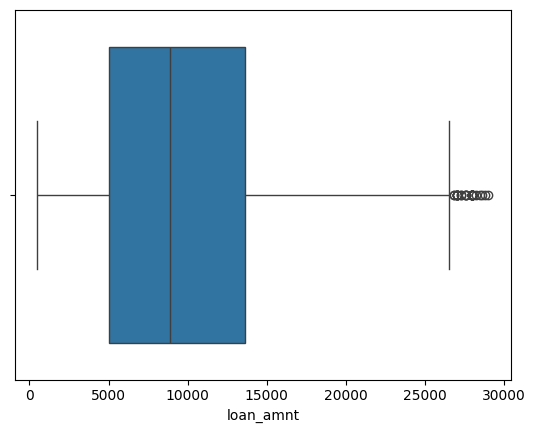

count    33123.000000
mean      9793.820759
std       5784.600495
min        500.000000
25%       5000.000000
50%       8875.000000
75%      13637.500000
max      29000.000000
Name: loan_amnt, dtype: float64

In [65]:
create_sns_boxplot(loan_df['loan_amnt'])
loan_df['loan_amnt'].describe()

## Conclusion: Most of the loan amount applied was in the range of 5K to 14K and maximum loan amount applied was ~27K

### Funded Loan Amount Distribution Chart

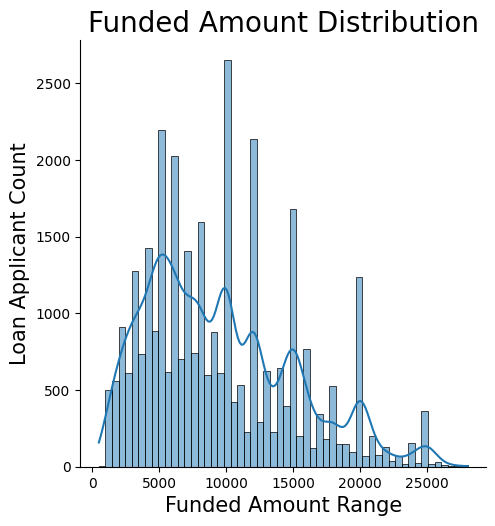

In [66]:
create_sns_displot(loan_df['funded_amnt'],"Funded Amount Distribution","Funded Amount Range","Loan Applicant Count")

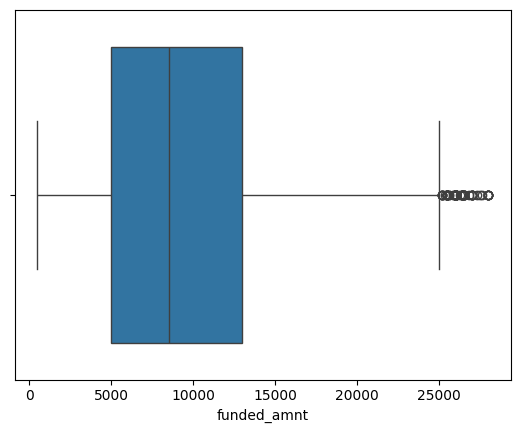

count    33123.000000
mean      9566.342119
std       5537.839091
min        500.000000
25%       5000.000000
50%       8500.000000
75%      13000.000000
max      28000.000000
Name: funded_amnt, dtype: float64

In [67]:
create_sns_boxplot(loan_df['funded_amnt'])
loan_df['funded_amnt'].describe()

## Conclusion: The funded amount for most of the loan applicants is between the range of 5K to 13K and maximum funded amount is ~25K

### Interest Rate Distribution Chart

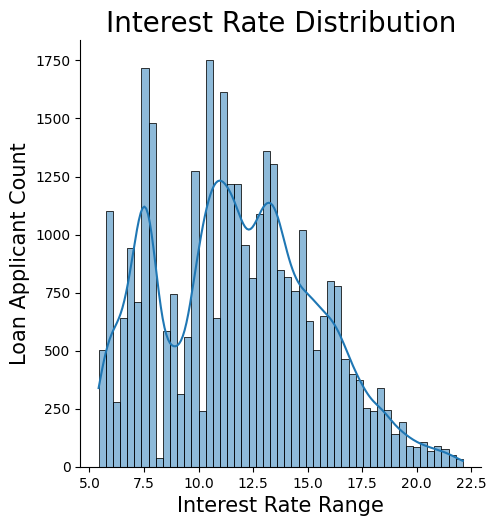

In [68]:
create_sns_displot(loan_df['int_rate'],"Interest Rate Distribution","Interest Rate Range","Loan Applicant Count")

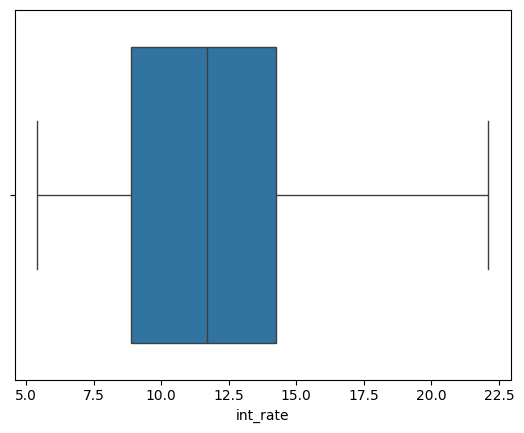

count    33123.000000
mean        11.784016
std          3.591743
min          5.420000
25%          8.900000
50%         11.710000
75%         14.260000
max         22.110000
Name: int_rate, dtype: float64

In [69]:
create_sns_boxplot(loan_df['int_rate'])
loan_df['int_rate'].describe()

## Conclusion: Most of the loan applicants have interest rate between range of 8% - 14%. The average rate of interest is 11.7%

### Home Ownership Chart

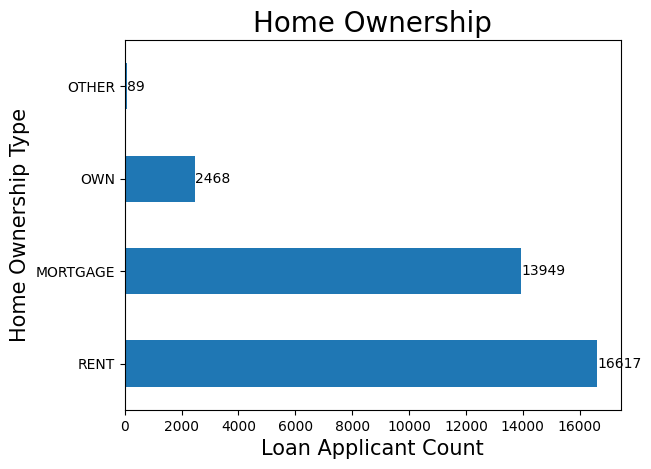

In [70]:
create_mlt_hbar(loan_df['home_ownership'],"Home Ownership","Home Ownership Type","Loan Applicant Count",[False])

## Conclusion: Majority of loan applicants are living either on Rent or on Mortgage

#### Loan Purpose Chart

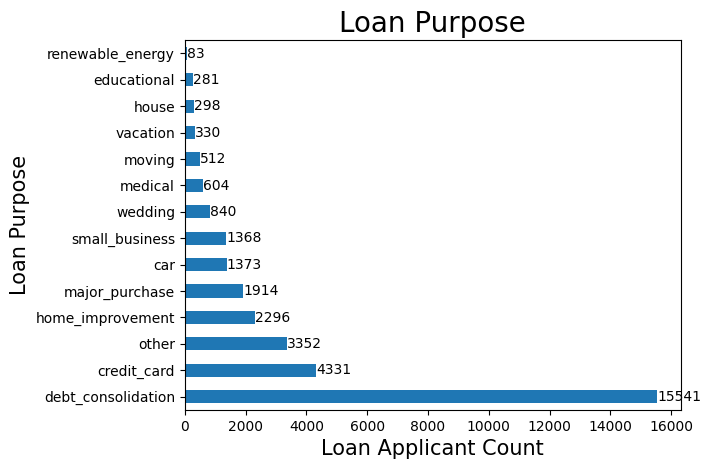

In [71]:
create_mlt_hbar(loan_df['purpose'],"Loan Purpose","Loan Purpose","Loan Applicant Count",[False])

## Conclusion: The purpose of most of the loan applicants is debt_consolidation 

#### Loan Status Chart

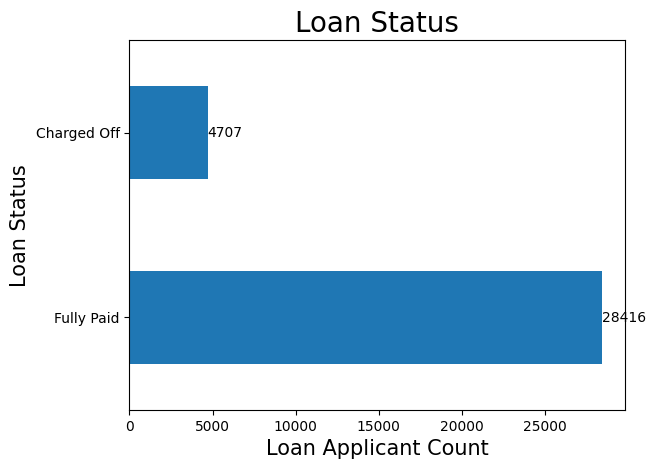

In [72]:
create_mlt_hbar(loan_df['loan_status'],"Loan Status","Loan Status","Loan Applicant Count",[False])

## Conclusion: Majority of the loan applicants have status as Fully Paid

### State Chart

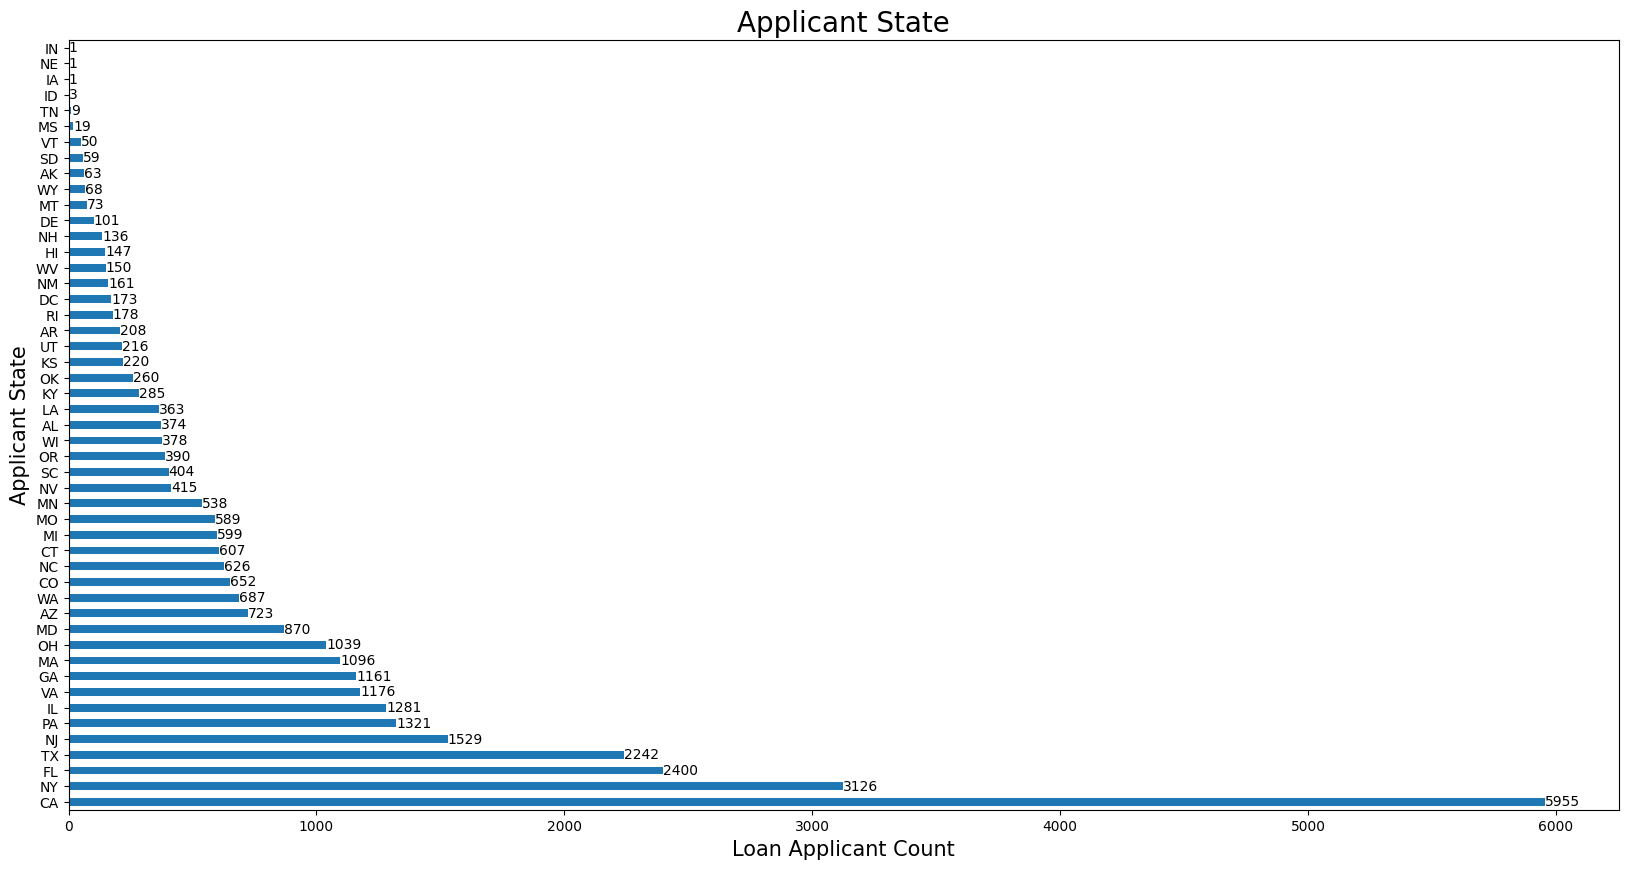

In [73]:
create_mlt_hbar(loan_df['addr_state'],"Applicant State","Applicant State","Loan Applicant Count",[True,20,10])

## Conclusion: Highest number of loan applicants are from CA state

### Employment length Chart

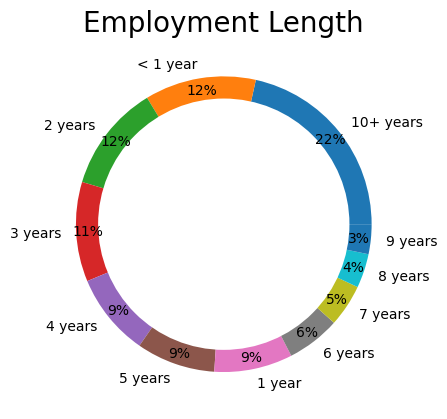

In [74]:
create_mlt_donut(loan_df['emp_length'], "Employment Length")

### Conclusion: Majority of the loan applicants have 10+ years of experience.

### Grade Chart

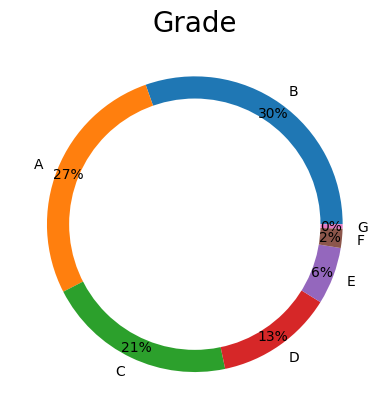

In [75]:
create_mlt_donut(loan_df['grade'], "Grade")

## Conclusion: Majority of the loan applicants belong to Grade B

### Installment Chart

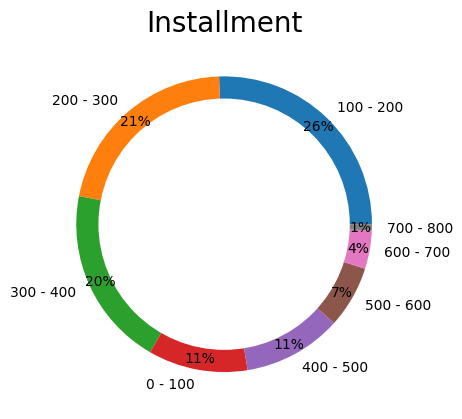

In [76]:
create_mlt_donut(loan_df['installment_bucket'], "Installment")

## Conclusion: Majority of the loan applicants will payment installment between 100-200

### Funded Amount Investors Chart

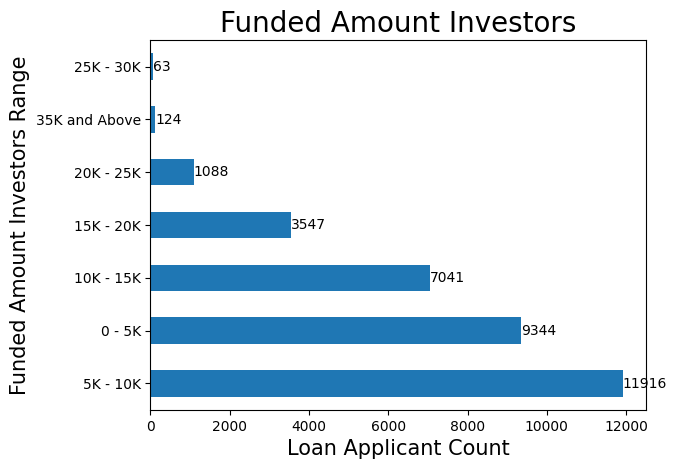

In [77]:
create_mlt_hbar(loan_df['funded_amnt_inv_bucket'],"Funded Amount Investors","Funded Amount Investors Range","Loan Applicant Count",[False])

## Conclusion: Majority of the investors have commited for an amount between 5K to 10K

### Verification Status Chart

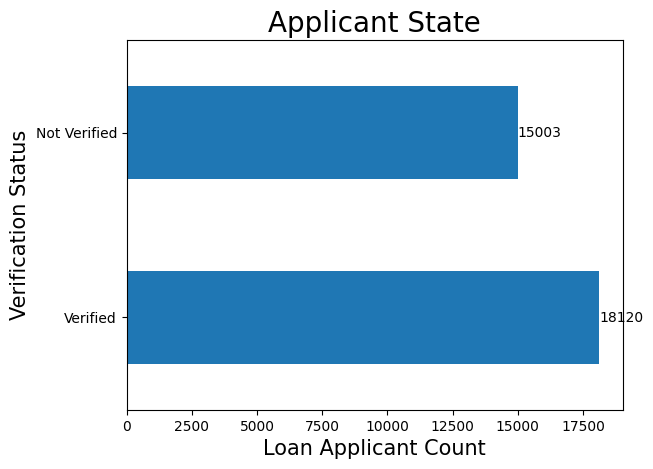

In [78]:
create_mlt_hbar(loan_df['verification_status'],"Applicant State","Verification Status","Loan Applicant Count",[False])

## Conclusion: Majority of the loan applicants belong to Verified status

### Issue Month Chart

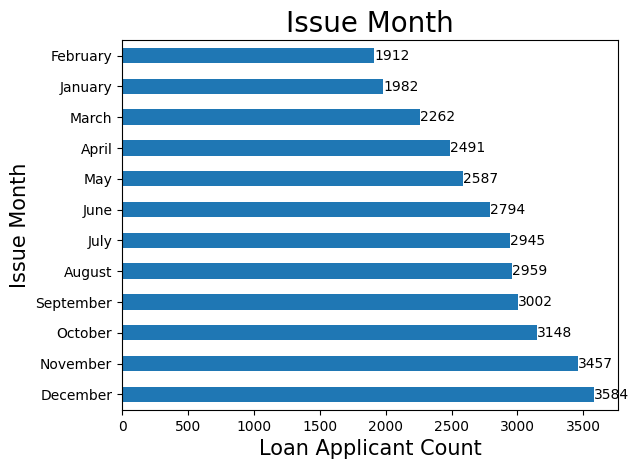

In [79]:
create_mlt_hbar(loan_df['issue_month'],"Issue Month","Issue Month","Loan Applicant Count",[False])

## Conclusion: Majority of the loans were funded in the month of December, followed by November and then October.

### Issue Year Chart

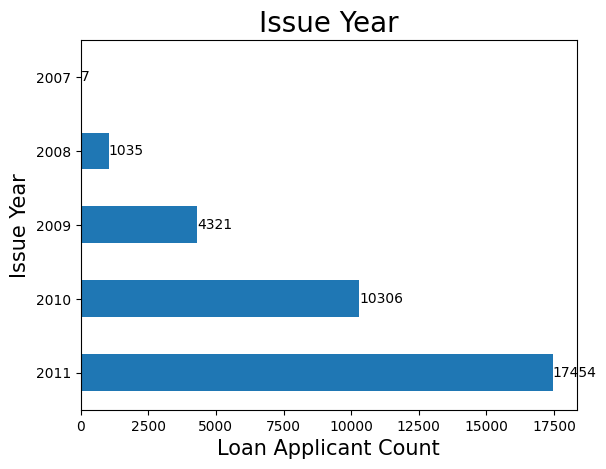

In [80]:
create_mlt_hbar(loan_df['issue_year'],"Issue Year","Issue Year","Loan Applicant Count",[False])

## Conclusion: Majority of loans funded were issued in the year 2011

### Loan Term Chart

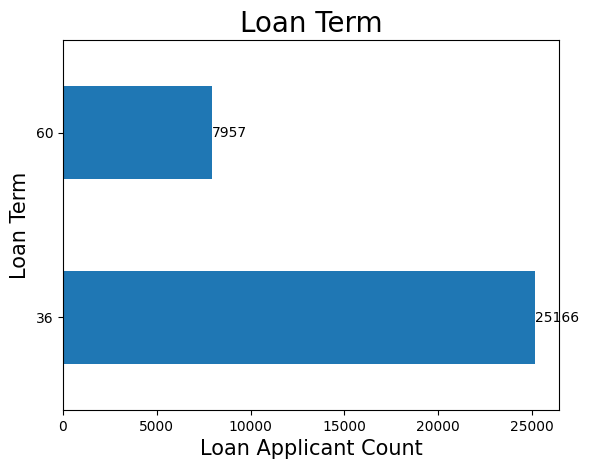

In [81]:
create_mlt_hbar(loan_df['term'],"Loan Term","Loan Term","Loan Applicant Count",[False])

## Conclusion: Majority of the Loans have a term of 36 months.

### Annual Income chart

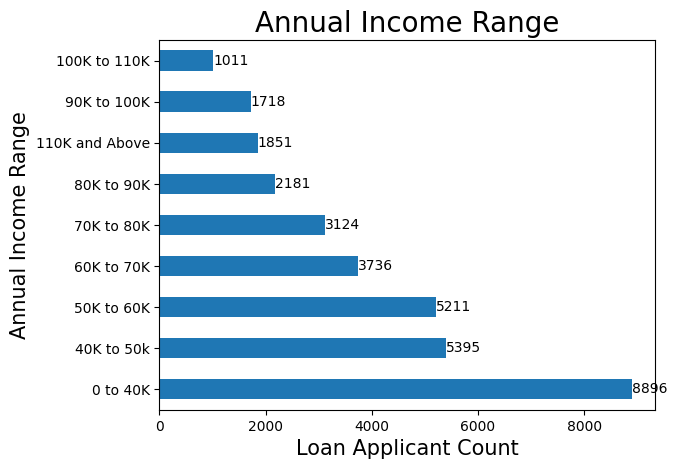

In [82]:
create_mlt_hbar(loan_df['annual_income_bucket'],"Annual Income Range","Annual Income Range","Loan Applicant Count",[False])

## Conclusion: Annual Income of majority of the loan applicants is below 40K

### Public Record of Bankruptcies Chart

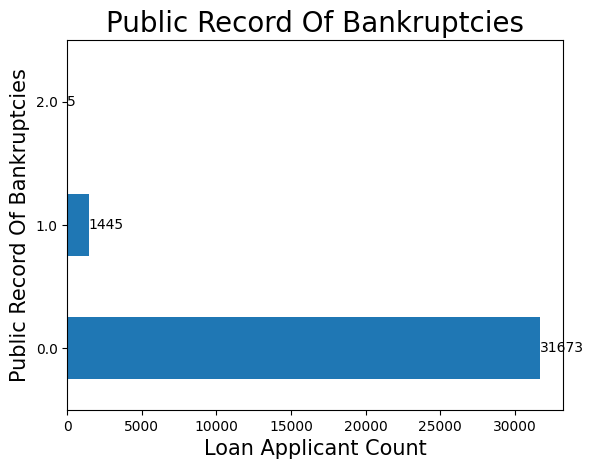

In [83]:
create_mlt_hbar(loan_df['pub_rec_bankruptcies'],"Public Record Of Bankruptcies","Public Record Of Bankruptcies","Loan Applicant Count",[False])

## Conclusion: Public Record of Bankruptcies for majority of the loan applicants is 0.

#### Interest Rate Chart

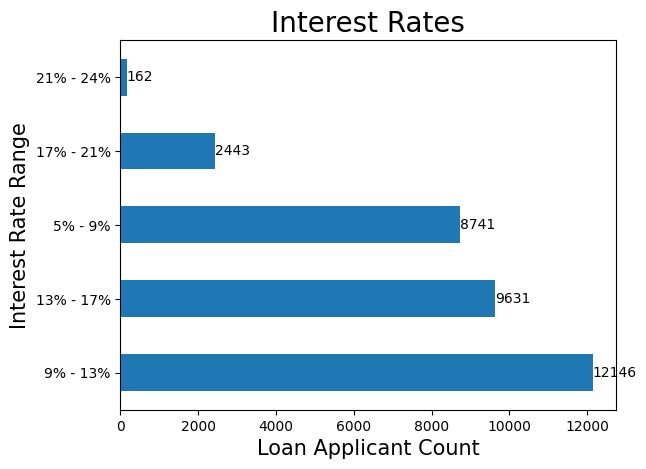

In [84]:
create_mlt_hbar(loan_df['int_rate_bucket'],"Interest Rates","Interest Rate Range","Loan Applicant Count",[False])

## Conclusion: Interest Rates of majority of the loan applicants is between the range 9% - 13%

### Loan Amounts Chart

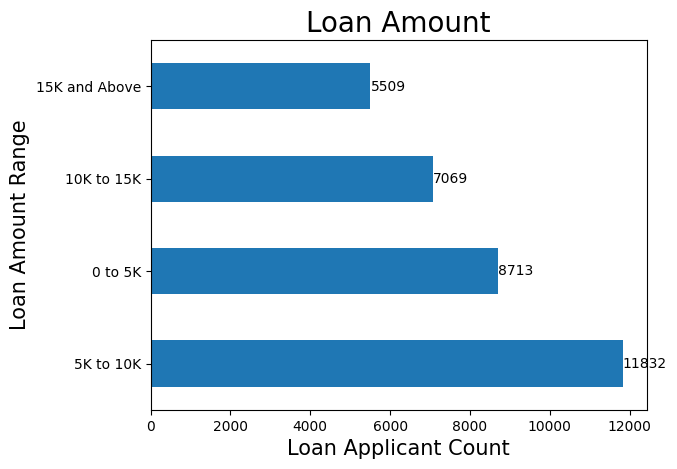

In [85]:
create_mlt_hbar(loan_df['loan_amnt_bucket'],"Loan Amount","Loan Amount Range","Loan Applicant Count",[False])

## Conclusion: Majority of the loan applicants have taken loan amount between 5K to 10k.

### DTI - Debt To Income Ratio Chart

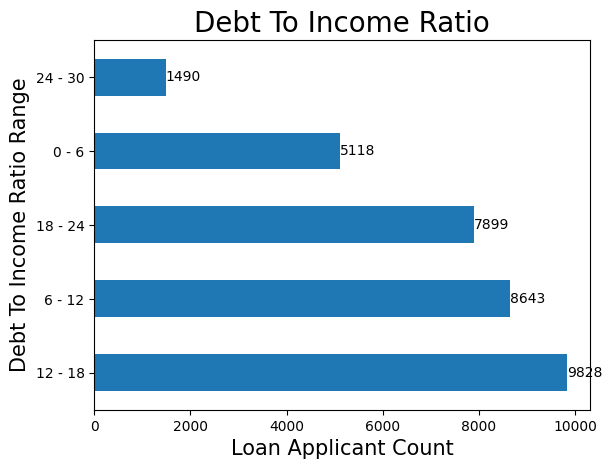

In [86]:
create_mlt_hbar(loan_df['dti_bucket'],"Debt To Income Ratio","Debt To Income Ratio Range","Loan Applicant Count",[False])

## Conclusion: Majority of the loan applicants have debt to income ratio between the range of 12 - 18

## Conclusions from Univariate Analysis:
- 1. The annual income of most of the loan applicants is between 40k-75k and the average annual income is 59840.
- 2. Most of the loan amount applied was in the range of 5K to 14K and maximum loan amount applied was ~27K.
- 3. The funded amount for most of the loan applicants is between the range of 5K to 13K and maximum funded amount is ~25K.
- 4. Most of the loan applicants have interest rate between range of 8% - 14%. The average rate of interest is 11.7%.
- 5. Majority of loan applicants are living either on Rent or on Mortgage.
- 6. The purpose of most of the loan applicants is debt_consolidation.
- 7. Majority of the loan applicants have status as Fully Paid.
- 8. Highest number of loan applicants are from CA state.
- 9. Majority of the loan applicants have 10+ years of experience.
- 10. Majority of the loan applicants belong to Grade B.
- 11. Majority of the loan applicants will payment installment between 100-200.
- 12. Majority of the investors have commited for an amount between 5K to 10K.
- 13. Majority of the loan applicants belong to Verified status.
- 14. Majority of the loans were funded in the month of December, followed by November and then October.
- 15. Majority of loans funded were issued in the year 2011.
- 16. Majority of the Loans have a term of 36 months.
- 17. Annual Income of majority of the loan applicants is below 40K.
- 18. Public Record of Bankruptcies for majority of the loan applicants is 0.
- 19. Majority of the loan applicants have taken loan amount between 5K to 10k.
- 20. Majority of the loan applicants have debt to income ratio between the range of 12 - 18.

# Bivariate Analysis

#### Purpose of Loan Vs Loan Status

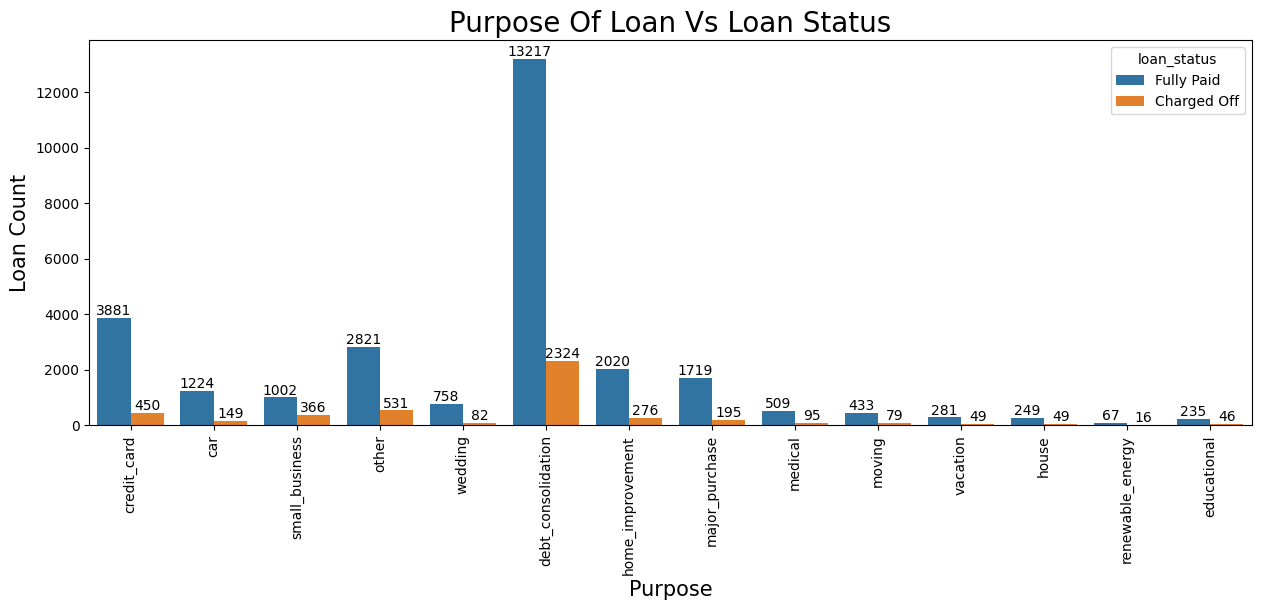

In [87]:
create_sns_countplot(loan_df,loan_df['purpose'],loan_df['loan_status'],"Purpose Of Loan Vs Loan Status","Purpose","Loan Count",True,[True,15,5])

## Conclusion: Debt Consolidation is the category where the maximum number of loans are issued and people have defaulted in the same category.

## Home Ownership Vs Loan Status

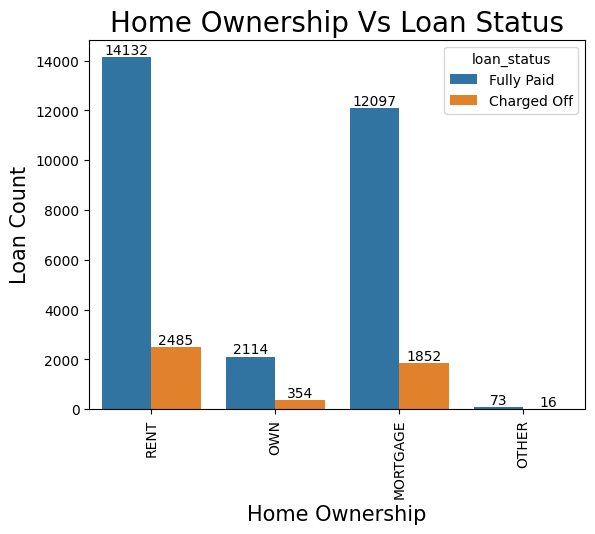

In [88]:
create_sns_countplot(loan_df,loan_df['home_ownership'],loan_df['loan_status'],"Home Ownership Vs Loan Status","Home Ownership","Loan Count",True,[False])

## Conclusion: Loan applicants with home ownership of RENT and MORTGAGE are more likely to default.

#### Verification Status Vs Loan Status

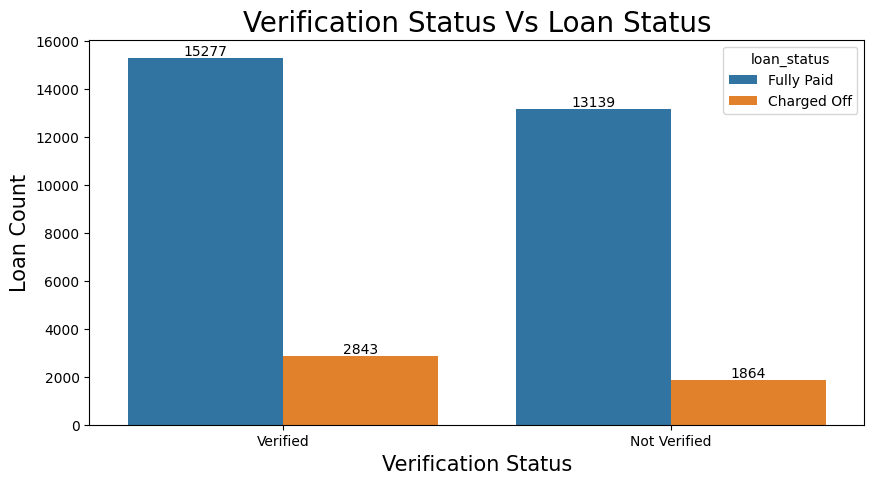

In [89]:
create_sns_countplot(loan_df,loan_df['verification_status'],loan_df['loan_status'],"Verification Status Vs Loan Status","Verification Status","Loan Count",False,[True,10,5])

## Conclusion: Verified loan applicants are defaulting more than who are Not Verified.

#### Address State Vs Loan Status

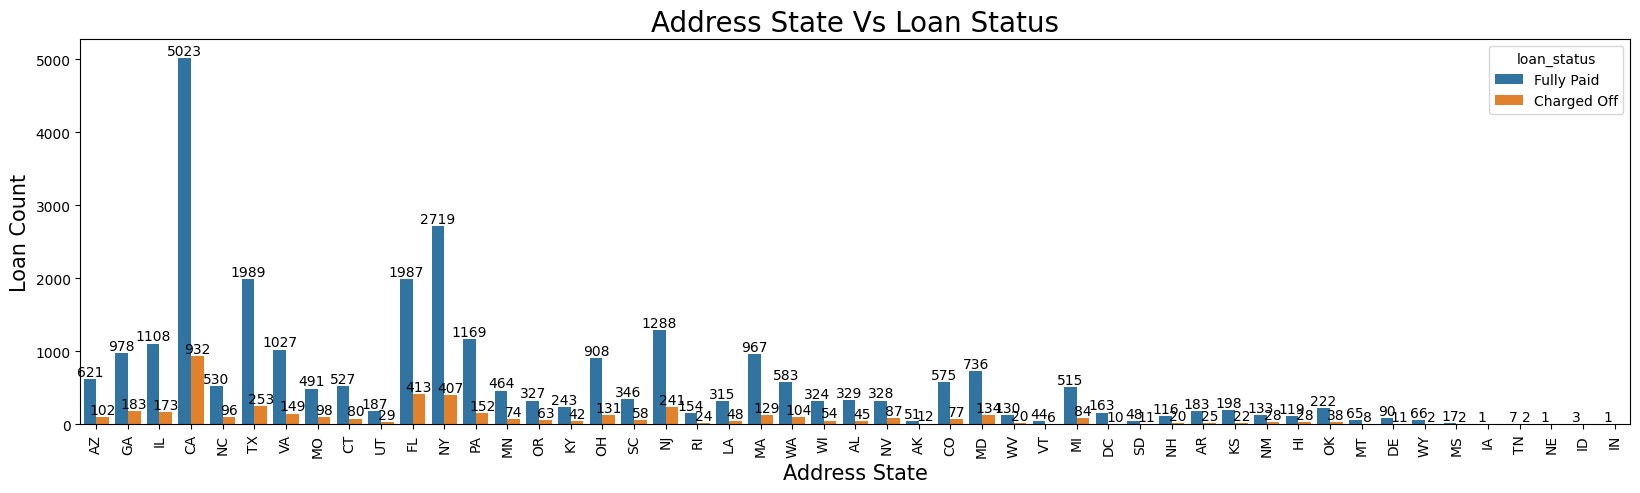

In [90]:
create_sns_countplot(loan_df,loan_df['addr_state'],loan_df['loan_status'],"Address State Vs Loan Status","Address State","Loan Count",True,[True,20,5])

## Conclusion: Loan applicants from states of California (CA), Florida (FL), and New York(NY)  are most likely to default.

## Loan Grade Vs Loan Status

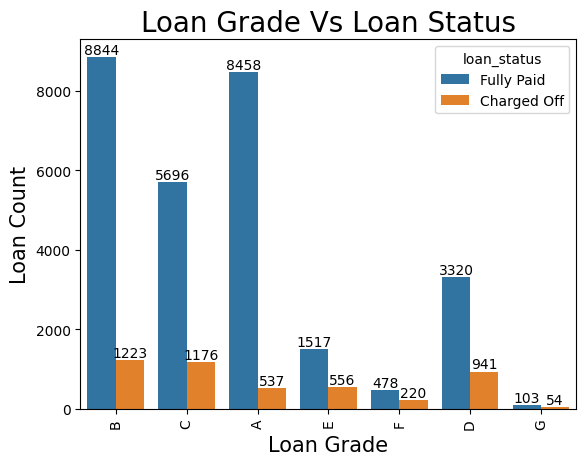

In [91]:
create_sns_countplot(loan_df,loan_df['grade'],loan_df['loan_status'],"Loan Grade Vs Loan Status","Loan Grade","Loan Count",True,[False])

## Conclusion: Loan applicants belonging to Grades B, C and D contribute to the most of the Charged Off loans

#### Loan Sub Grade Vs Loan Status

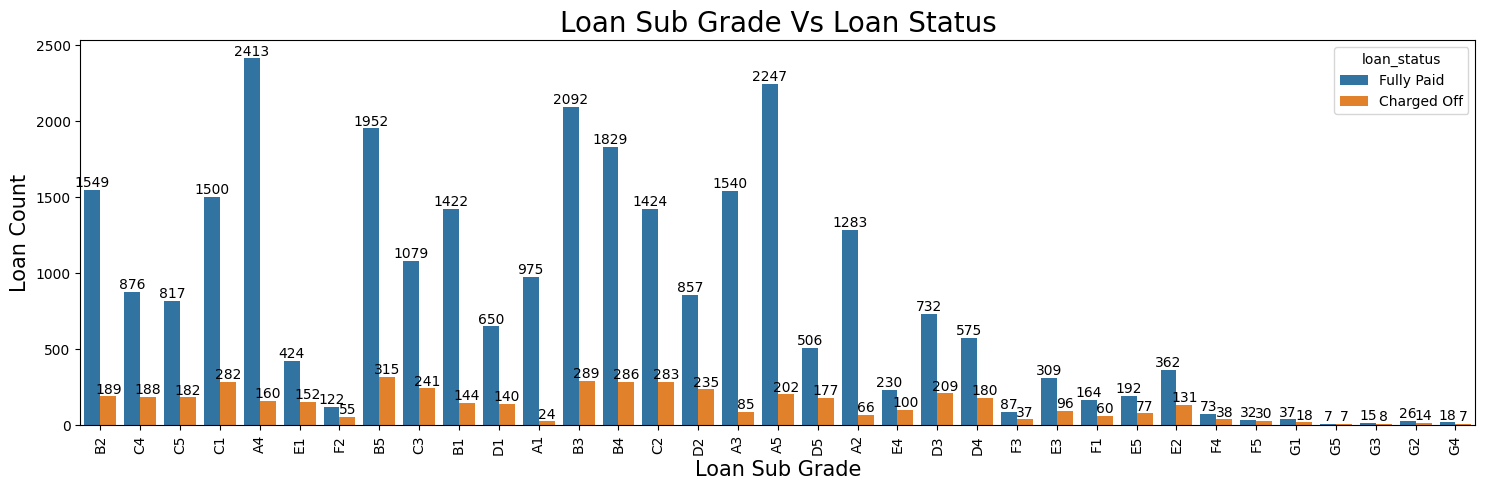

In [92]:
create_sns_countplot(loan_df,loan_df['sub_grade'],loan_df['loan_status'],"Loan Sub Grade Vs Loan Status","Loan Sub Grade","Loan Count",True,[True,18,5])

## Conclusion: Loan applicants belonging to Sub Grades B3, B4 and B5 contribute to the most of the Charged Off loans

#### Loan Term Vs Loan Status

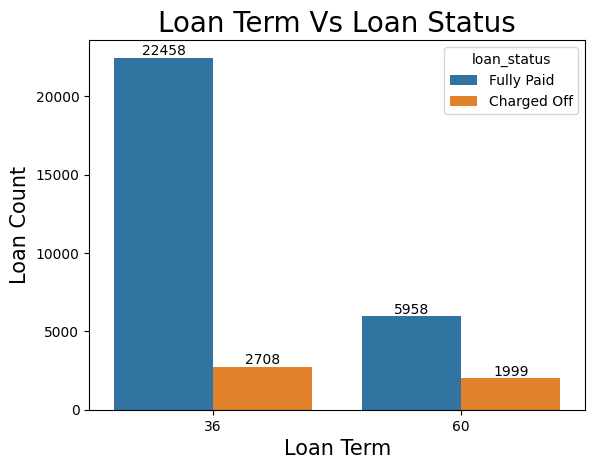

In [93]:
create_sns_countplot(loan_df,loan_df['term'],loan_df['loan_status'],"Loan Term Vs Loan Status","Loan Term","Loan Count",False,[False])

## Conclusion: Loan applicants applying for 36 month term are more likely to default than those taking loans for 60 months

#### Employment Length Vs Loan Status

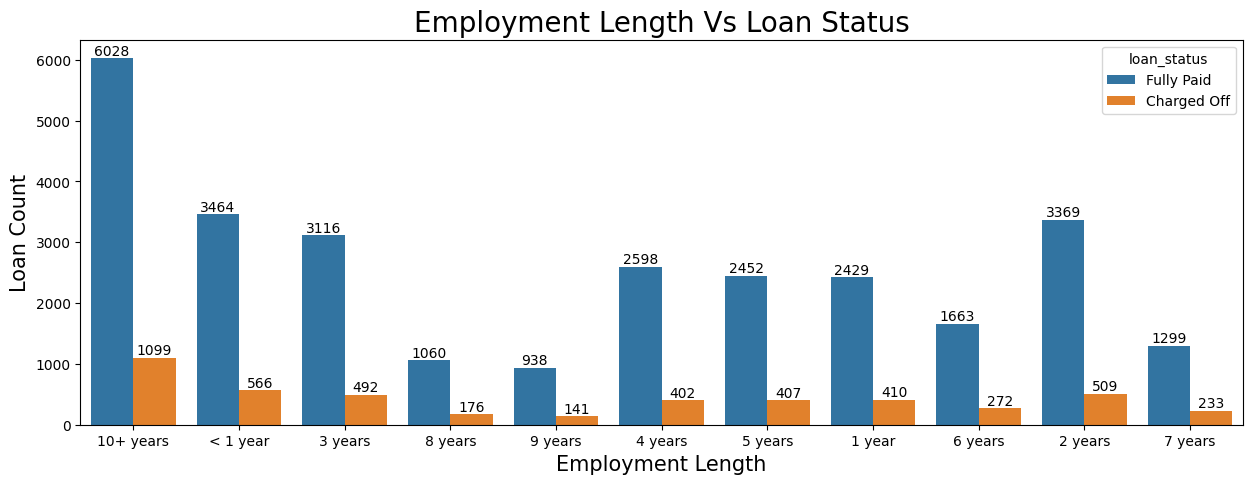

In [94]:
create_sns_countplot(loan_df,loan_df['emp_length'],loan_df['loan_status'],"Employment Length Vs Loan Status","Employment Length","Loan Count",False,[True,15,5])

## Conclusion: Loan applicants with more than 10 years employment length contribute the most to the charge off loans.

#### Issue Year Vs Loan Status

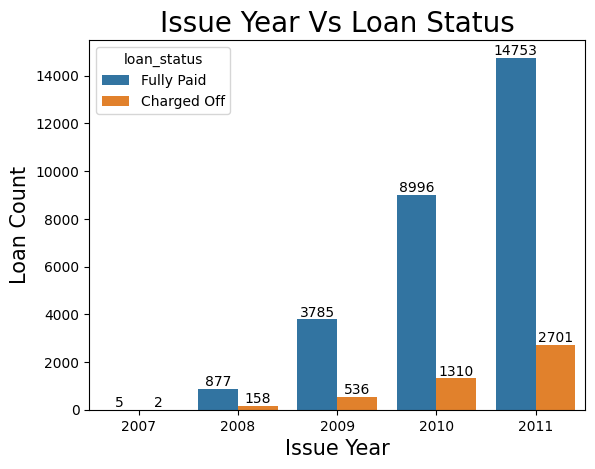

In [95]:
create_sns_countplot(loan_df,loan_df['issue_year'],loan_df['loan_status'],"Issue Year Vs Loan Status","Issue Year","Loan Count",False,[False])

## Conclusion: The number of loan applicants have steadily increased from 2007 to 2011, indicating a postive trend in upcoming years, 2011 year has the highest number of loan applicants and charge off's.

#### Issue Month Vs Loan Status

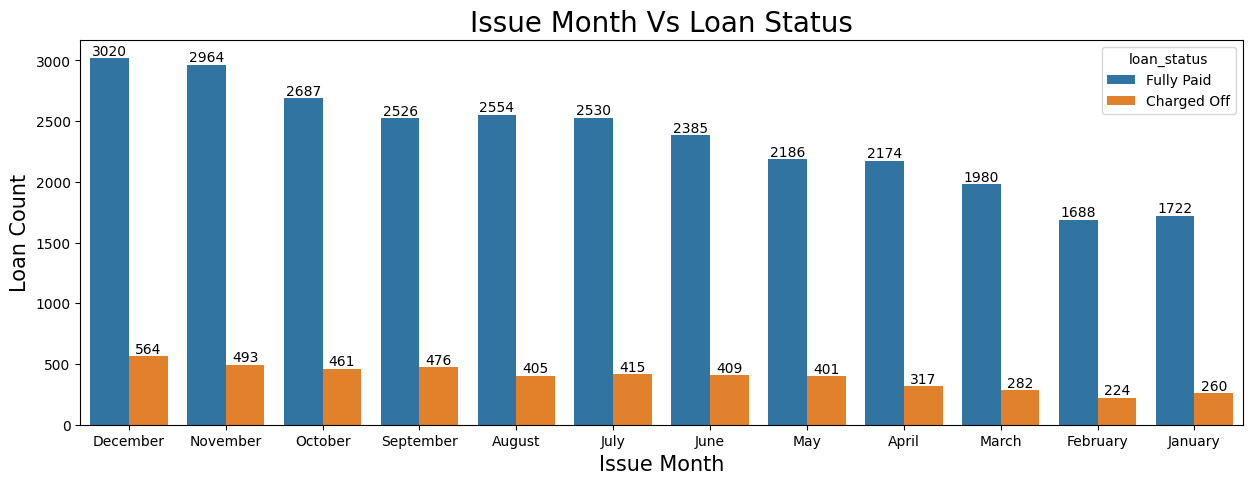

In [96]:
create_sns_countplot(loan_df,loan_df['issue_month'],loan_df['loan_status'],"Issue Month Vs Loan Status","Issue Month","Loan Count",False,[True,15,5])

## Conclusion: December is the most prefered month for taking loans.

#### Annual Income Bucket Vs Loan Status

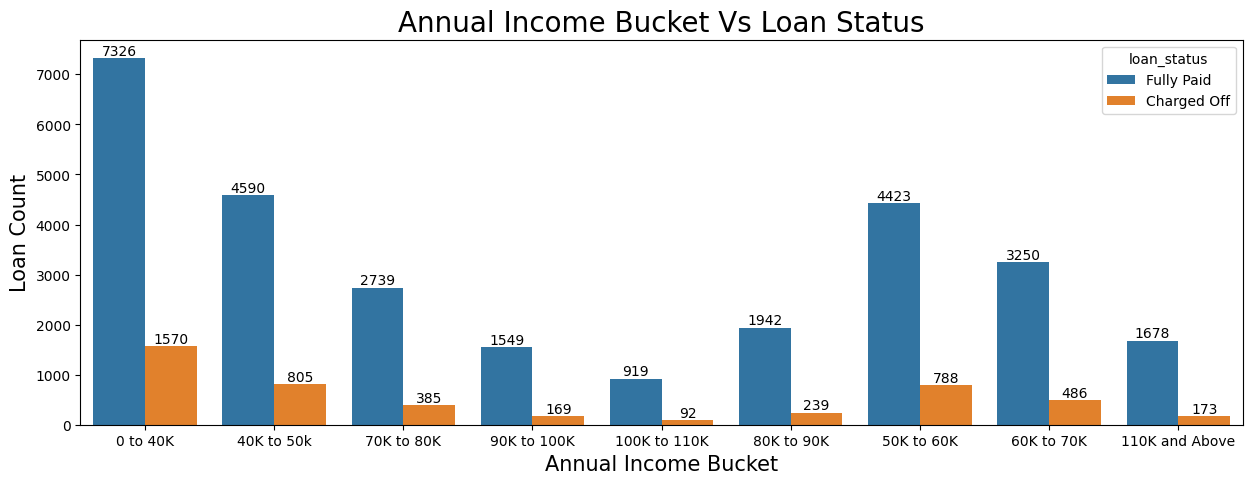

In [97]:
create_sns_countplot(loan_df,loan_df['annual_income_bucket'],loan_df['loan_status'],"Annual Income Bucket Vs Loan Status","Annual Income Bucket","Loan Count",False,[True,15,5])

## Conclusion: Annual Income of the most of the loan applicants is under 40K

#### Loan Amount Bucket Vs Loan Status

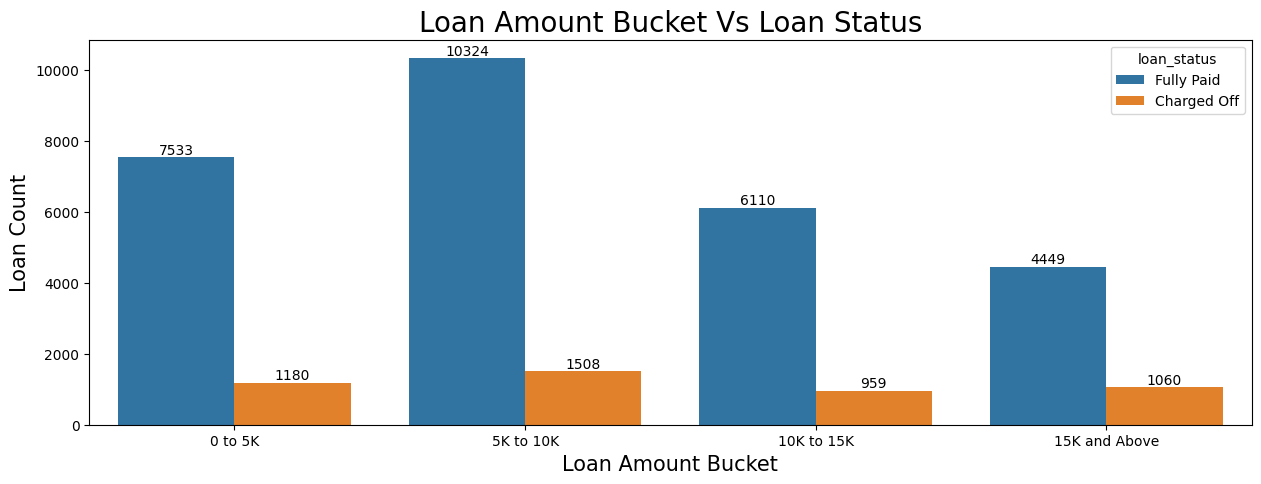

In [98]:
create_sns_countplot(loan_df,loan_df['loan_amnt_bucket'],loan_df['loan_status'],"Loan Amount Bucket Vs Loan Status","Loan Amount Bucket","Loan Count",False,[True,15,5])

## Conclusion: Loan Amount is highest in the range 5K to 10K

#### Interest Rate Bucket Vs Status of Loan

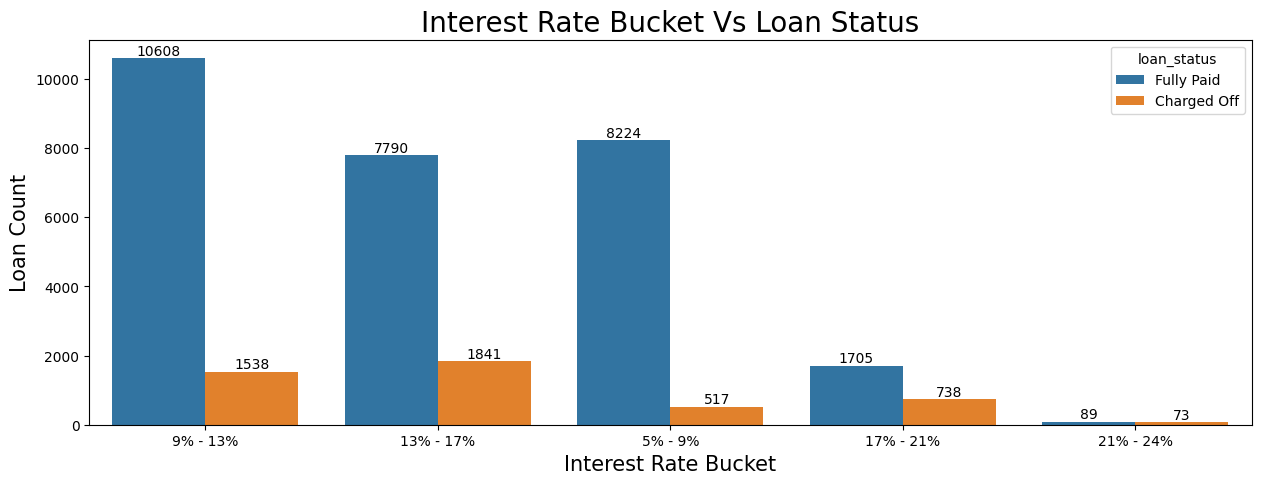

In [99]:
create_sns_countplot(loan_df,loan_df['int_rate_bucket'],loan_df['loan_status'],"Interest Rate Bucket Vs Loan Status","Interest Rate Bucket","Loan Count",False,[True,15,5])

## Conclusion: Interest Rate of loan applicants with highest defaults is between 13% to 17%

#### DTI Bucket Vs Status of Loan

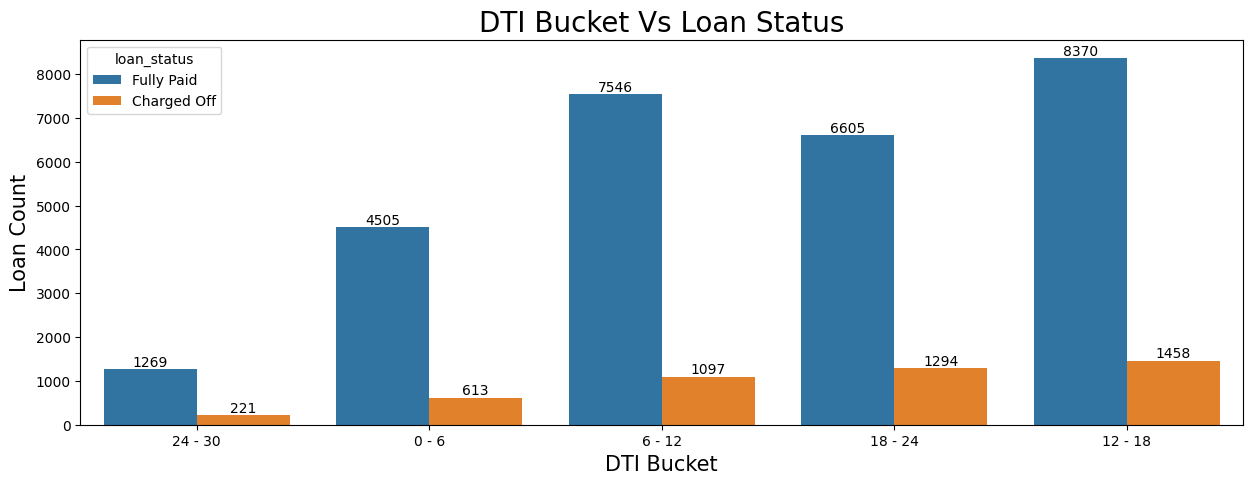

In [100]:
create_sns_countplot(loan_df,loan_df['dti_bucket'],loan_df['loan_status'],"DTI Bucket Vs Loan Status","DTI Bucket","Loan Count",False,[True,15,5])

## Conclusion: DTI for highest charge off loans is between 12 - 18

#### Installment Bucket Vs Loan Status

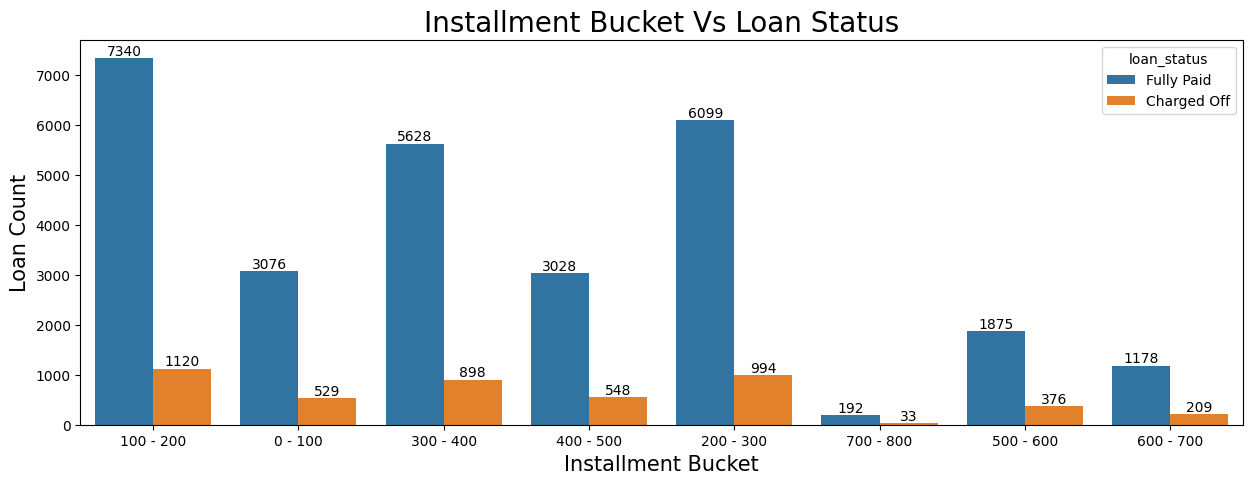

In [101]:
create_sns_countplot(loan_df,loan_df['installment_bucket'],loan_df['loan_status'],"Installment Bucket Vs Loan Status","Installment Bucket","Loan Count",False,[True,15,5])

## Conclusion: Montly installment is highest in the range 100-200

### funded_amnt_inv_bucket Vs Loan Status

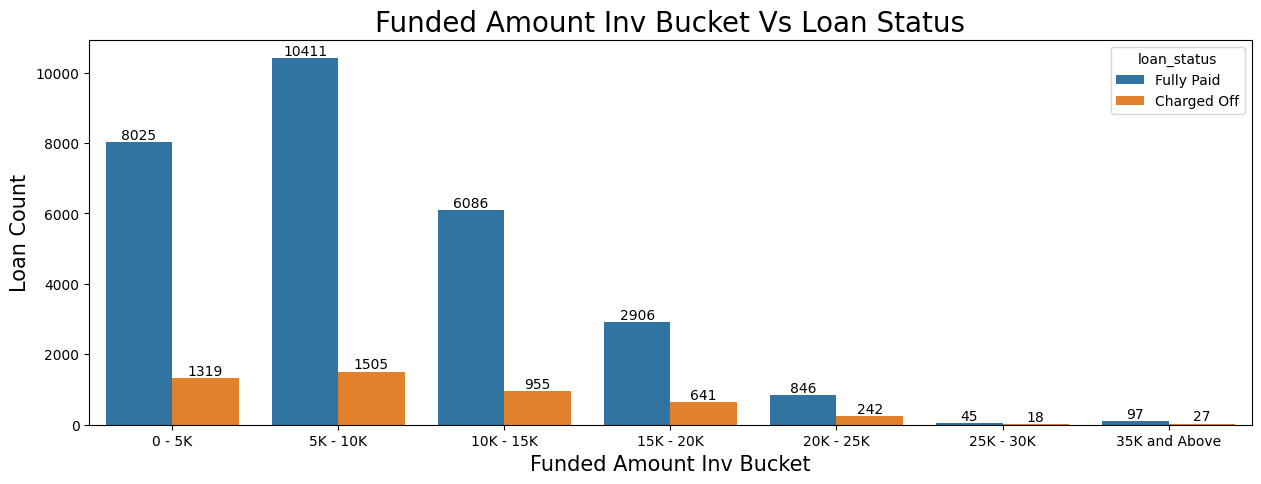

In [102]:
create_sns_countplot(loan_df,loan_df['funded_amnt_inv_bucket'],loan_df['loan_status'],"Funded Amount Inv Bucket Vs Loan Status","Funded Amount Inv Bucket","Loan Count",False,[True,15,5])

## Conclusion: Funded Amount By Investors is highest in the range of 5K to 10K

## Conclusion from Bivariate Analysis:

- 1. Debt Consolidation is the category where the maximum number of loans are issued and people have defaulted in the same category.
- 2. Loan applicants with home ownership as RENT and MORTGAGE are more likely to default.
- 3. Verified loan applicants are defaulting more than who are Not Verified.
- 4. Loan applicants from states of California (CA), Florida (FL), and New York (NY) are most likely to default.
- 5. Loan applicants belonging to Grades B, C and D contribute to the most of the Charged Off loans.
- 6. Loan applicants belonging to Sub Grades B3, B4 and B5 contribute to the most of the Charged Off loans.
- 7. Loan applicants applying for 36 month term are more likely to default than those taking loans for 60 months.
- 8. Loan applicants with more than 10 years employment length contribute the most to the charge off loans.
- 9. The number of loan applicants have steadily increased from 2007 to 2011, indicating a postive trend in upcoming years, 2011 year has the highest number of loan applicants and defaulters.
- 10. December is the most prefered month for taking loans.

# Multivariate Analysis

#### Annual Income Vs Loan Purpose Vs Loan Status

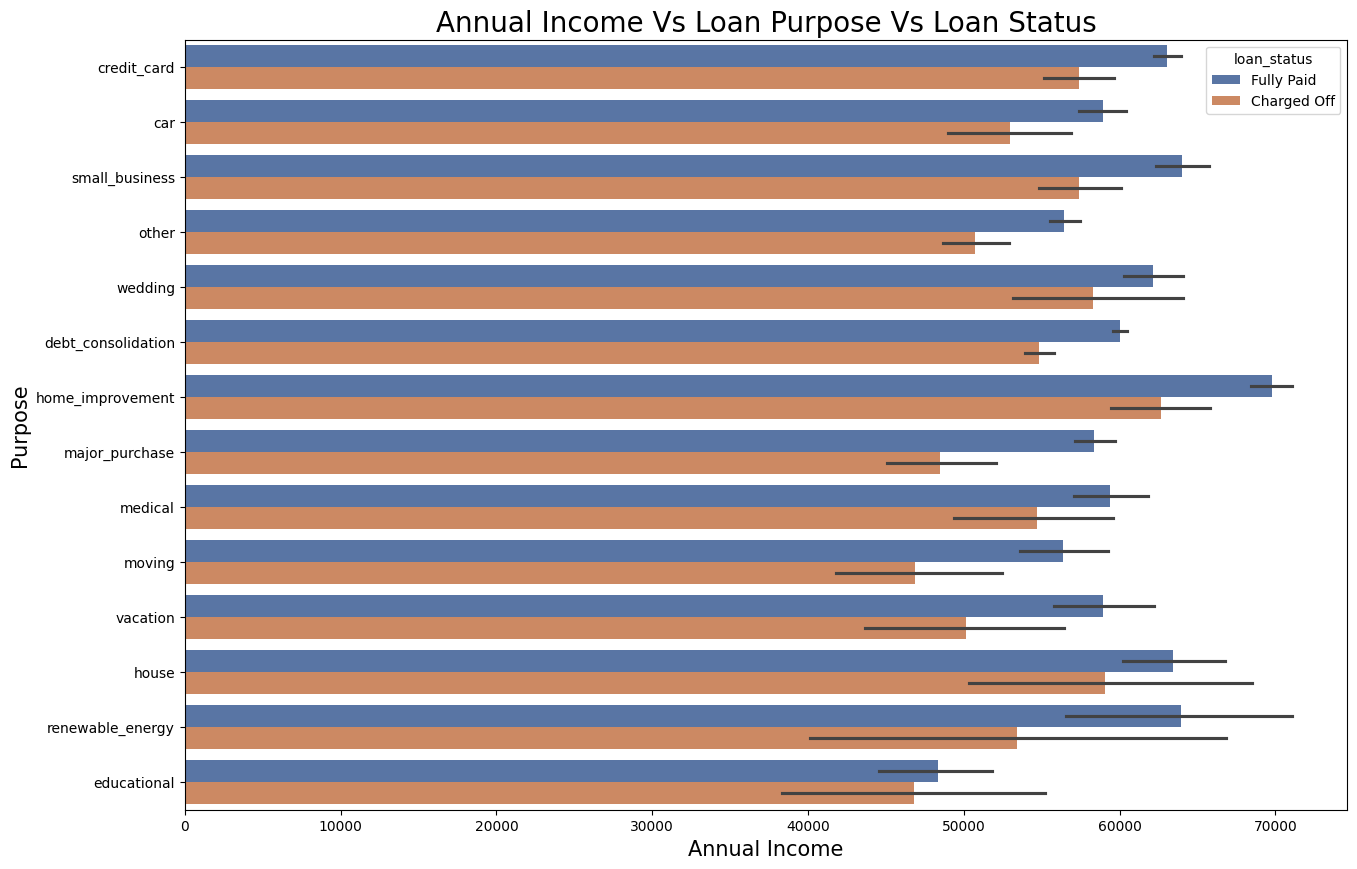

In [103]:
create_sns_barplot(loan_df, loan_df['annual_inc'], loan_df['purpose'], loan_df['loan_status'], "Annual Income Vs Loan Purpose Vs Loan Status", "Annual Income", "Purpose",[True,15,10])

## Conclusion: Though the number of loans applied and defaulted are the highest in number for "debt_consolidation". The annual income of those who applied under the "debt_consolidation" purpose isn't the highest. Applicants with higher annual income applied loans for home_improvement, house, renewable_energy and small_businesses.

#### Annual Income Vs Home Ownership Vs Loan Status

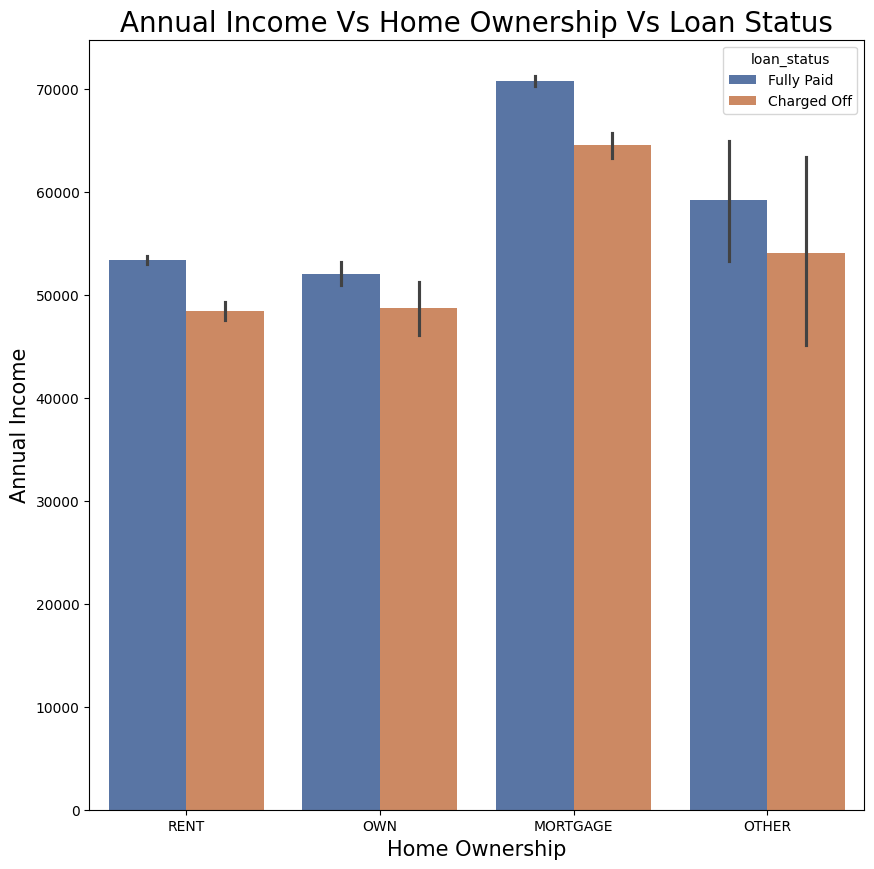

In [104]:
create_sns_barplot(loan_df, loan_df['home_ownership'], loan_df['annual_inc'], loan_df['loan_status'], "Annual Income Vs Home Ownership Vs Loan Status", "Home Ownership", "Annual Income",[True,10,10])

## Conclusion: The highest number of loan applicants who have defaulted have a house ownership of 'MORTGAGE' and also have the highest Annual Income.

#### Annual Income Vs Loan Amount Vs Loan Status

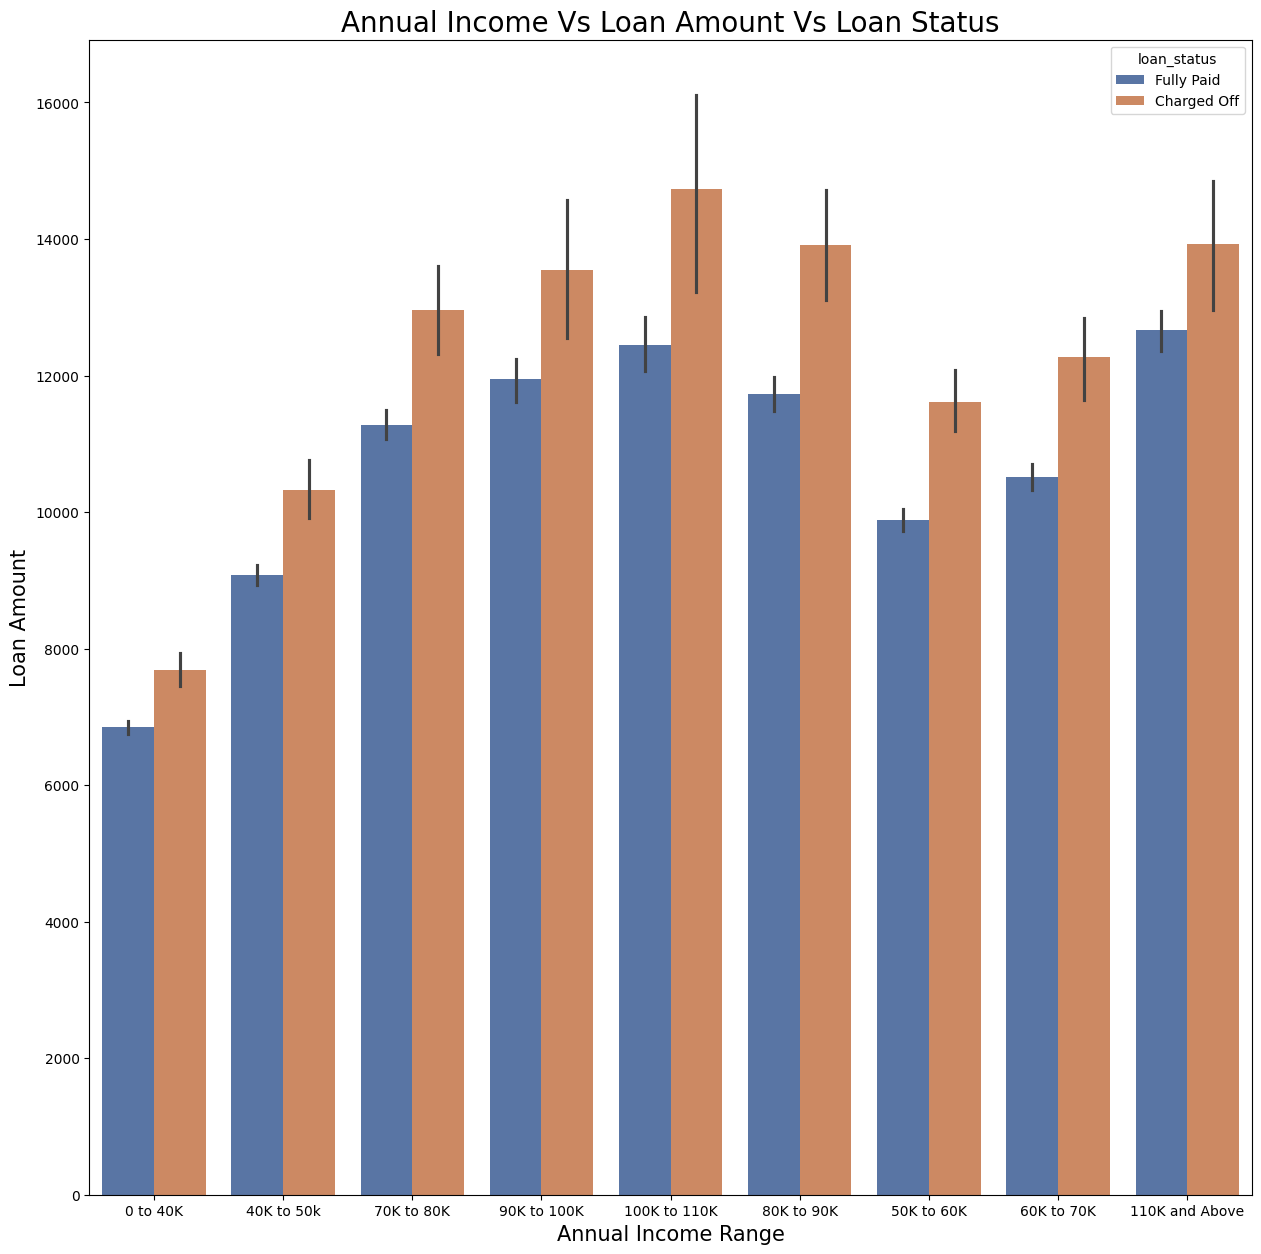

In [105]:
create_sns_barplot(loan_df, loan_df['annual_income_bucket'], loan_df['loan_amnt'], loan_df['loan_status'], "Annual Income Vs Loan Amount Vs Loan Status", "Annual Income Range", "Loan Amount",[True,15,15])

## Conclusion: Across all income groups, the number of defaulters and the loan amount is higher is higher income groups.

#### Annual Income Vs Interest Rate Vs Loan Status

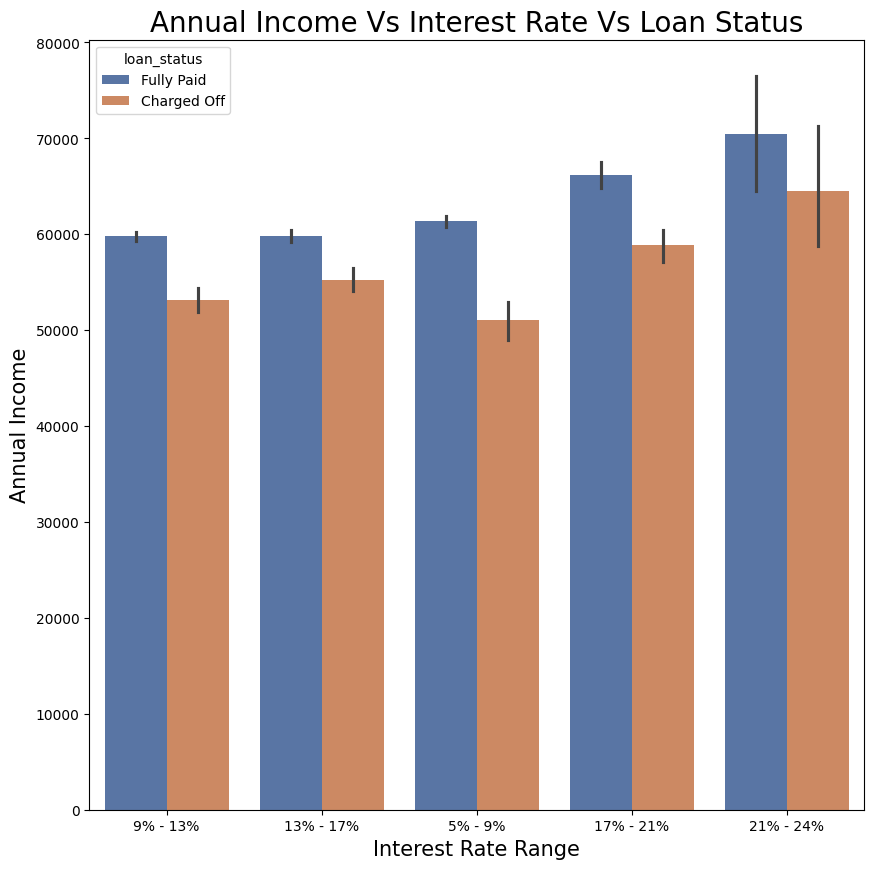

In [106]:
create_sns_barplot(loan_df, loan_df['int_rate_bucket'], loan_df['annual_inc'], loan_df['loan_status'], "Annual Income Vs Interest Rate Vs Loan Status", "Interest Rate Range", "Annual Income",[True,10,10])

## Conclusion: The interest rate for charged off loans at a rate of 21-24% and have an income of 60-70k

#### Interest Rate Vs Loan Amount Vs Loan Status

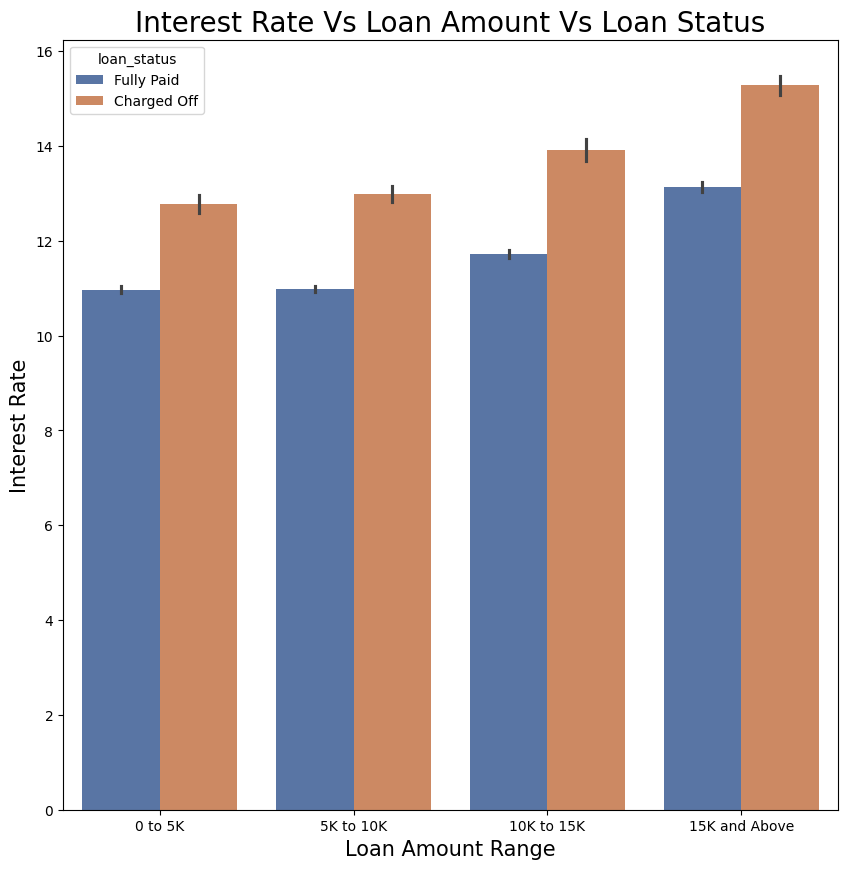

In [107]:
create_sns_barplot(loan_df, loan_df['loan_amnt_bucket'], loan_df['int_rate'], loan_df['loan_status'], "Interest Rate Vs Loan Amount Vs Loan Status", "Loan Amount Range", "Interest Rate",[True,10,10])

## Conclusion: Loan applicants with loan amount of 15K and Above have an interest rate between 14 - 16%

#### Loan Amount Vs Purpose Vs Loan Status

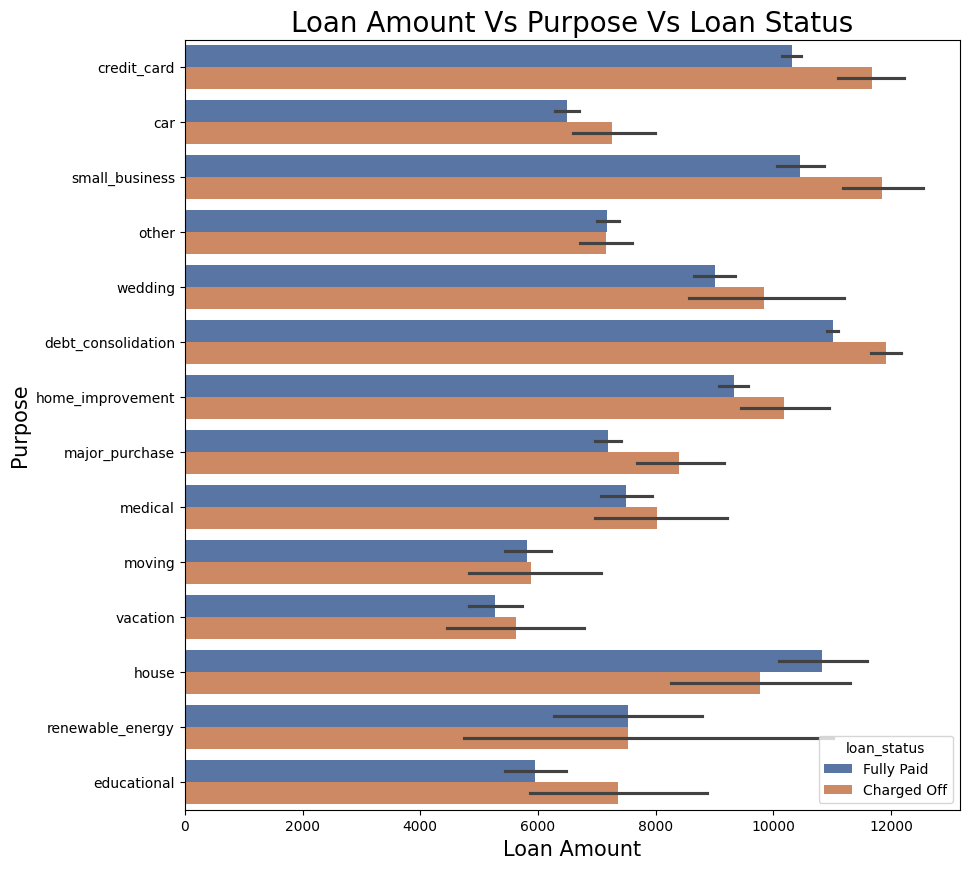

In [108]:
create_sns_barplot(loan_df, loan_df['loan_amnt'], loan_df['purpose'], loan_df['loan_status'], "Loan Amount Vs Purpose Vs Loan Status", "Loan Amount", "Purpose",[True,10,10])

## Conclusion: Loan applicants with purpose of 'small_business' have taken highest loan amount of 12k

#### Loan Amount Vs House Ownership Vs Loan Status

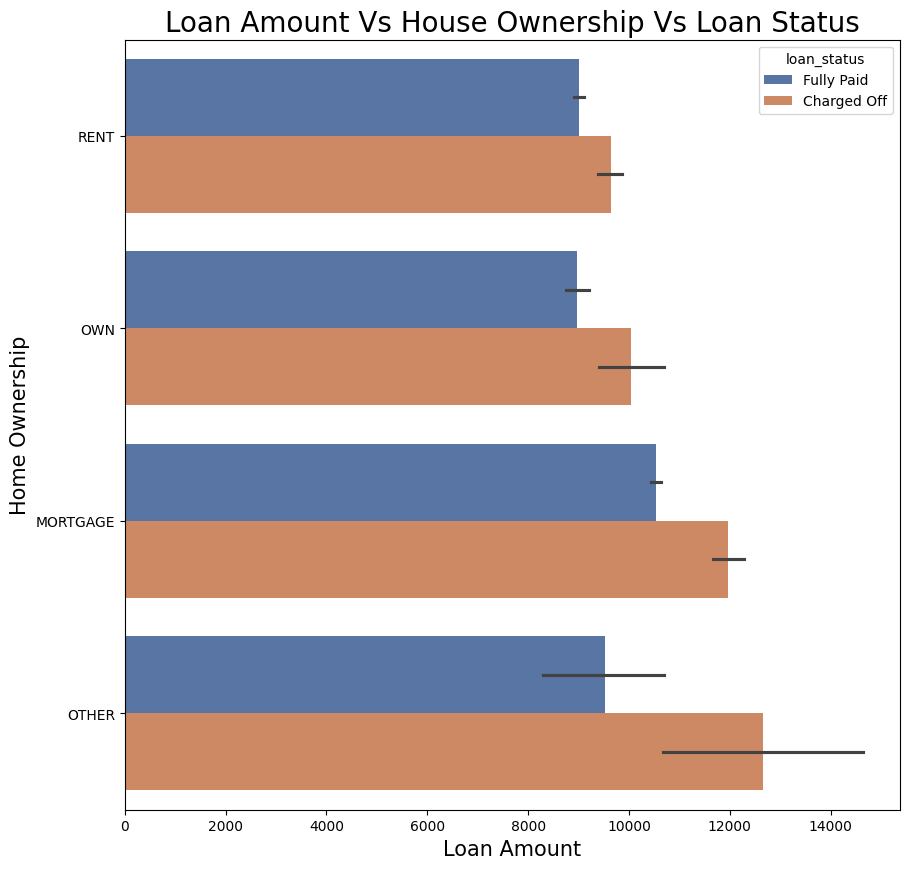

In [109]:
create_sns_barplot(loan_df, loan_df['loan_amnt'], loan_df['home_ownership'], loan_df['loan_status'], "Loan Amount Vs House Ownership Vs Loan Status", "Loan Amount", "Home Ownership",[True,10,10])

## Conclusion: Loan applicants whose ownership is OTHER have taken the highest loan amount between 12-14k while the applicants whose ownership is 'MORTGAGE' have taken loan amount between 12K to 14K.

#### Loan Amount Vs Grade Vs Loan Status

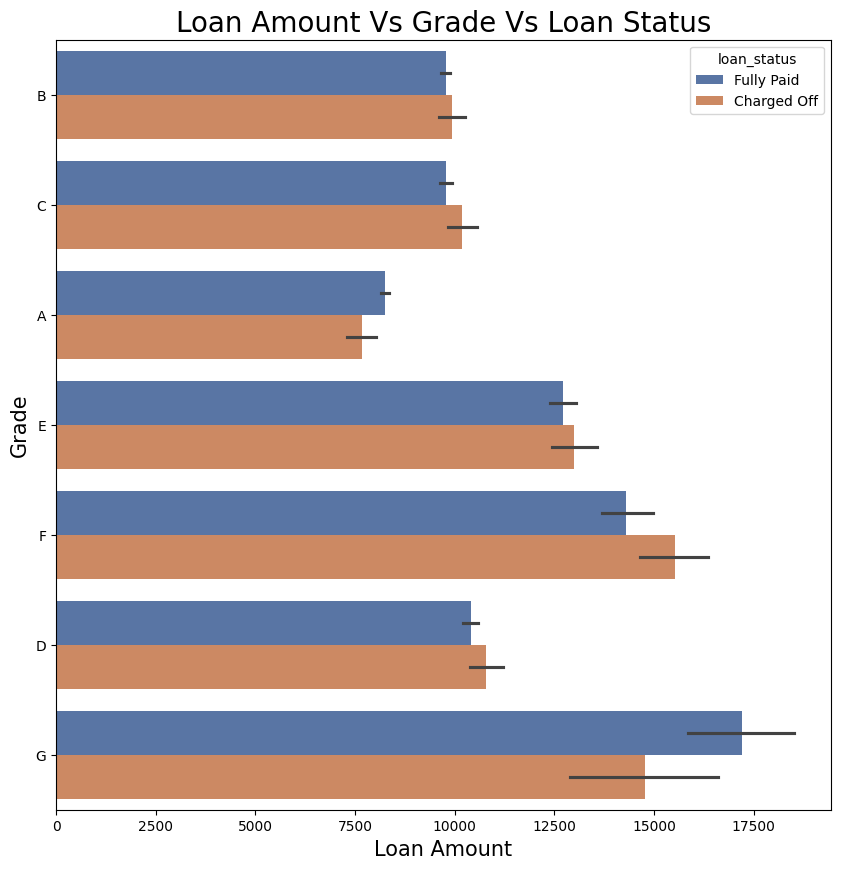

In [110]:
create_sns_barplot(loan_df, loan_df['loan_amnt'], loan_df['grade'], loan_df['loan_status'], "Loan Amount Vs Grade Vs Loan Status", "Loan Amount", "Grade",[True,10,10])

## Conclusion: For grade of F the loan amount is between 15K to 17.5K

#### Loan Amount Vs Employee Length Vs Loan Status

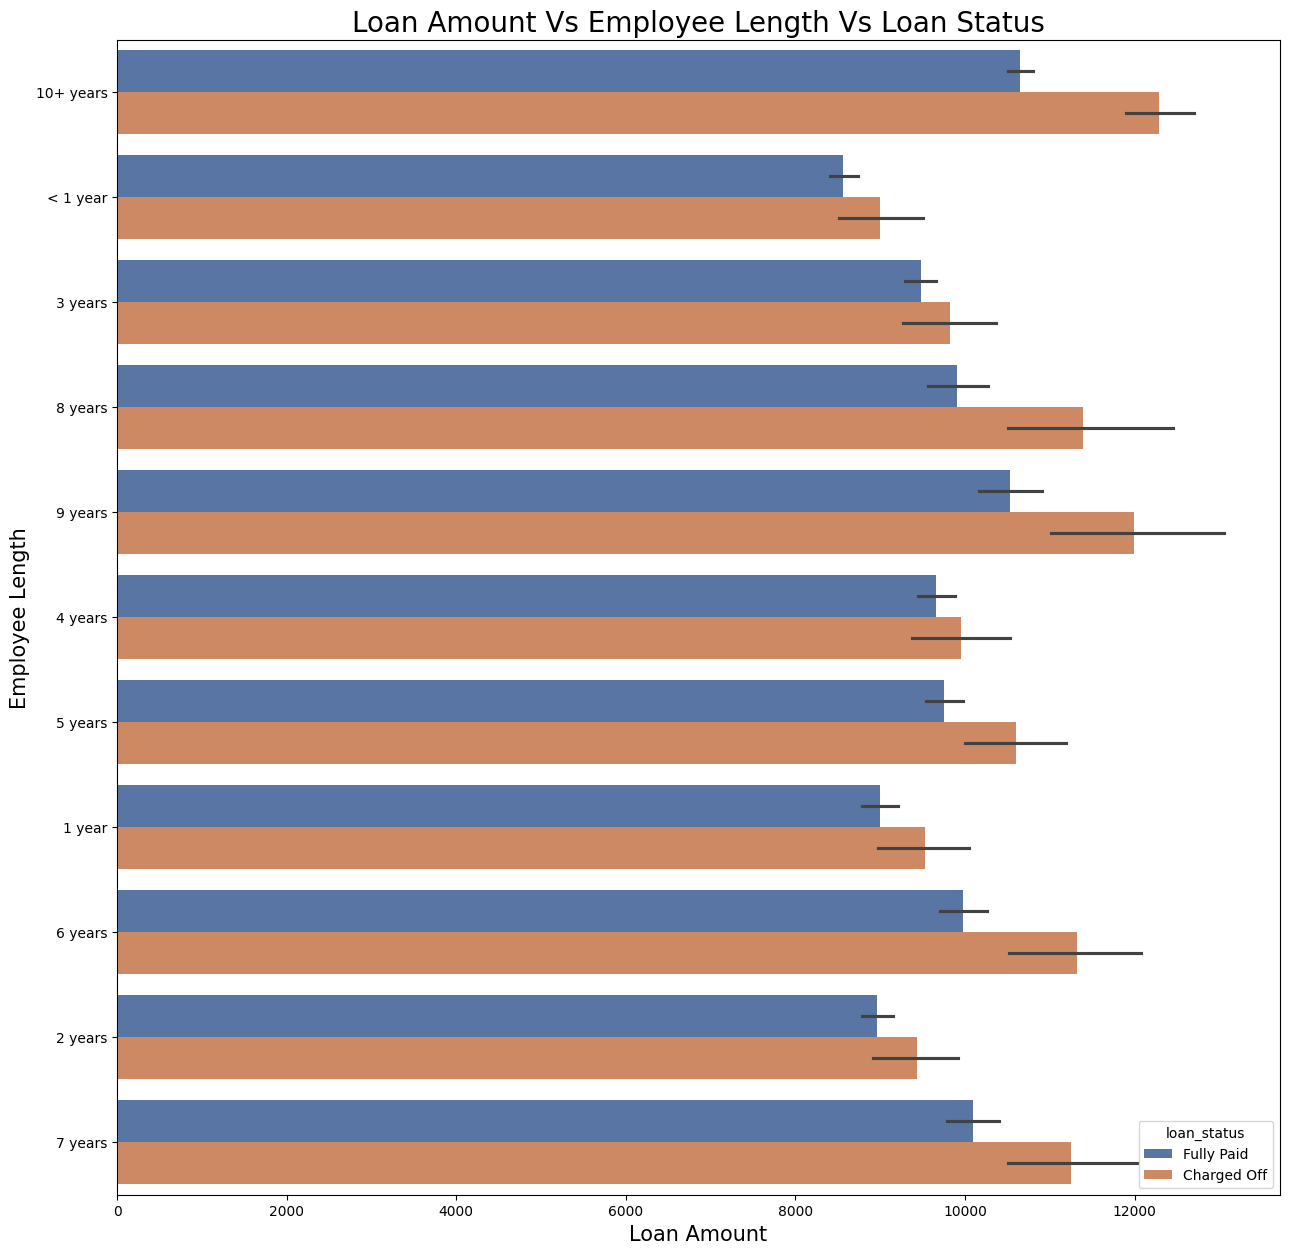

In [111]:
create_sns_barplot(loan_df, loan_df['loan_amnt'], loan_df['emp_length'], loan_df['loan_status'], "Loan Amount Vs Employee Length Vs Loan Status", "Loan Amount", "Employee Length",[True,15,15])

## Conclusion: For applicants with employment length above 10 years, the loan amount is greater than 12K

#### Grade Vs Interest Rate Vs Loan Status

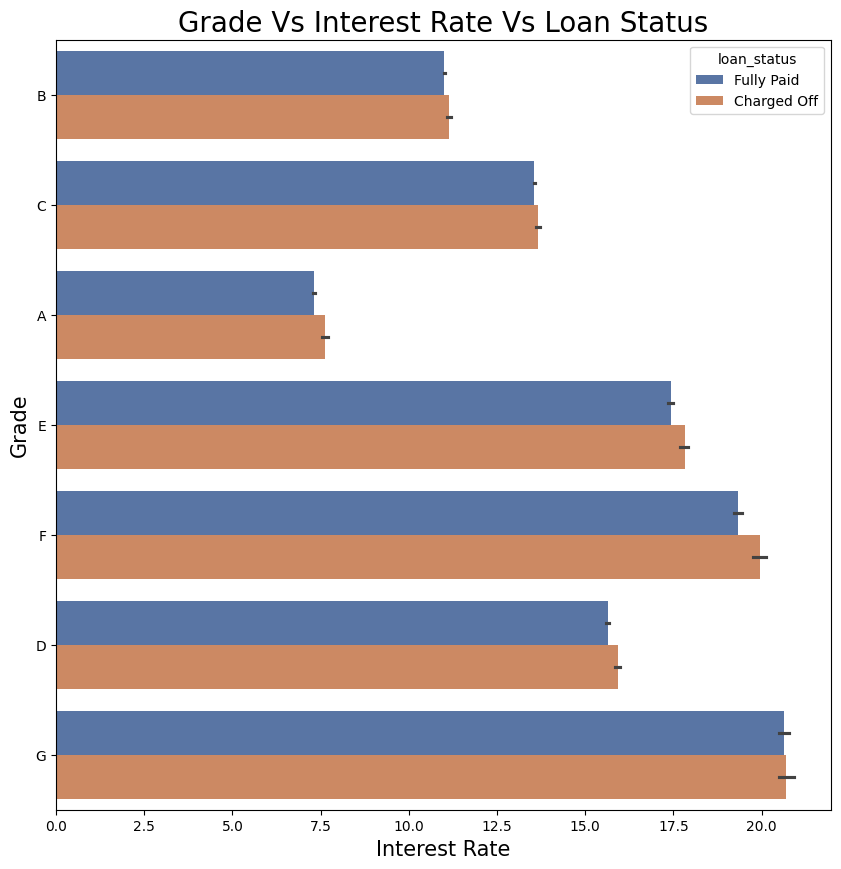

In [112]:
create_sns_barplot(loan_df, loan_df['int_rate'], loan_df['grade'], loan_df['loan_status'], "Grade Vs Interest Rate Vs Loan Status", "Interest Rate", "Grade",[True,10,10])

## Conclusion: Applicants with Grade G have interest rate more than 20%

#### Interest Rate Vs Loan Amount Vs Loan Status

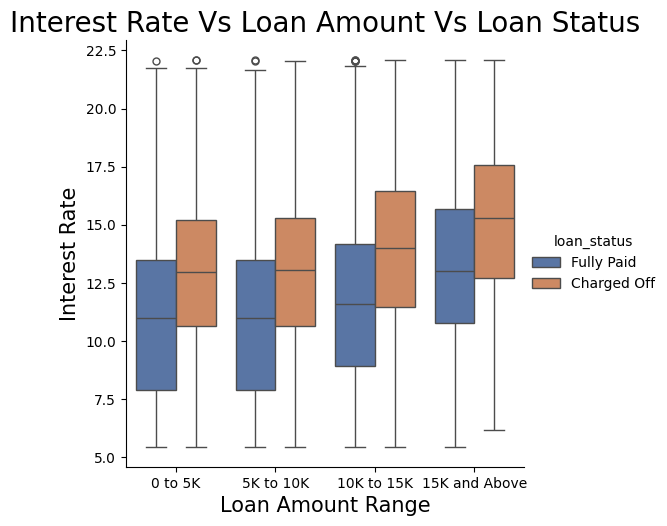

In [113]:
create_sns_catplot(loan_df, loan_df['loan_amnt_bucket'], loan_df['int_rate'], loan_df['loan_status'], "Interest Rate Vs Loan Amount Vs Loan Status", "Loan Amount Range", "Interest Rate",[False,0,0])

## Conclusion: As the Loan Amount increases, the Interest Rate also increases. The interest rate for charged off loans is higher than that of fully paid loans in all the loan_amount groups.

#### Term Vs Loan Amount Vs Loan Status

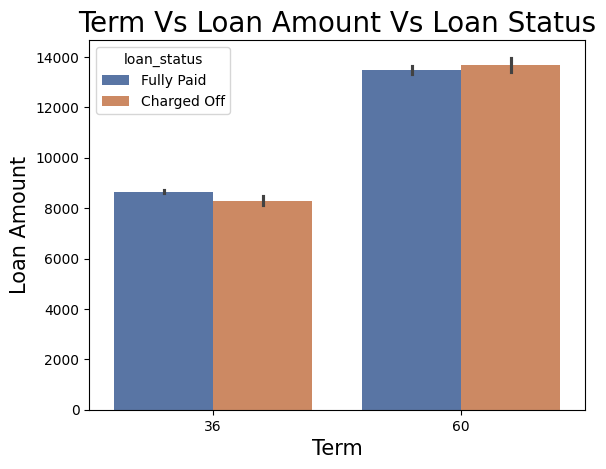

In [114]:
create_sns_barplot(loan_df, loan_df['term'], loan_df['loan_amnt'], loan_df['loan_status'], "Term Vs Loan Amount Vs Loan Status", "Term", "Loan Amount",[False])

## Conclusion: Loan applicants who have applied for long term of 60 Months have applied for higher loan amounts.

## Conclusions from Multivariate Analysis:

- 1. Though the number of loans applied and defaulted are the highest in number for "debt_consolidation". The annual income of those who applied under the "debt_consolidation".purpose isn't the highest. Applicants with higher annual income applied loans for home_improvement, house, renewable_energy and small_businesses.
- 2. The highest number of loan applicants who have defaulted have a house ownership of 'MORTGAGE' and also have the highest Annual Income.
- 3. Across all income groups, the number of defaulters and the loan amount is higher is higher income groups.
- 4. The interest rate for charged off loans at a rate of 21-24% and have an income of 60-70k.
- 5. Loan applicants with loan amount of 15K and above have an interest rate between 14 - 16%.
- 6. Loan applicants with purpose of 'small_business' have taken highest loan amount of 12k.
- 7. Loan applicants whose ownership is OTHER have taken the highest loan amount between 12-14k while the applicants whose ownership is 'MORTGAGE' have taken loan amount between 12K to 14K.
- 8. For grade of F the loan amount is between 15K to 17.5K.
- 9. For applicants with employment length above 10 years, the loan amount is greater than 12K.
- 10. Applicants with Grade G have interest rate more than 20%.
- 11. As the Loan Amount increases, the Interest Rate also increases. The interest rate for charged off loans is higher than that of fully paid loans in all the loan_amount groups.
- 12. Loan applicants who have applied for long term of 60 Months have applied for higher loan amounts.

## Correlation Analysis

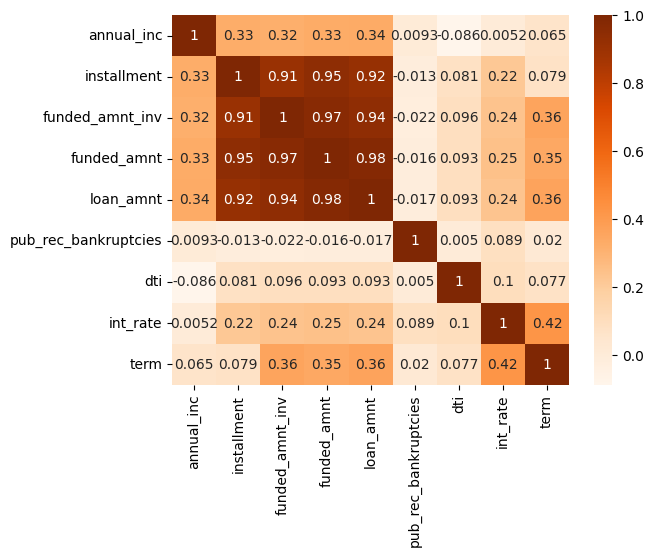

In [115]:
corr_loan = loan_df[['annual_inc','installment','funded_amnt_inv','funded_amnt','loan_amnt','pub_rec_bankruptcies','dti','int_rate','term']]
corr = corr_loan.corr()
sns.heatmap(corr, annot=True, cmap='Oranges')
plt.show()

### Observations:

#### Strong Correlation:
- 1. installment has strong correlation with funded_amnt, loan_amnt and funded_amnt_inv
- 2. term has a strong correlation with interest rate 
- 3. annual_inc has a strong correlation with loan amount

#### Weak Correlation:
- 1. dti has weak correlation with most of the fields.

#### Negative Correlation:
- 1. annual_inc has negative correlation with dti
- 2. pub_rec_bankrupticies has a negative correlation with almost every field



## Final Conclusion

- 1. There has been a positive trend in loan applications from 2007 to 2011. The company should capitalize on the market's growth trend by meeting
the increased demand.
- 2. Highest number of loan applications are seen in the month of December. Possibly due to holiday season. Company can use this trend and create
new marketing strategy.
- 3. Grades B, C and D have a high possibility of defaulting and hence needs stricter risk assessment.
- 4. Sub Grades B3, B4 and B5 have a high possibility of defaulting and hence needs stricter risk assessment.
- 5. Company should carefully evaluate loan applications applied for debt consolidation purpose.
- 6. Company should evaluate the home ownership status of the loan applicant to access housing stability, and it impact on the applicant's ability to
repay the loan.
- 7. It has been seen that verified applicants were the highest in loan defaulters. Company needs consider improvising on their verification process.
- 8. It has been seen that highest number of defaulter belong to CA, NY and FL states. Company should consider implementing stricter risk
assessment for these states.
- 9. Loan applicants with short term, 36 months term have been seen defaulting more compared to long term, 60 months tenure. Company can think
of increasing the interest rates for short term loans.